<a href="https://colab.research.google.com/github/powerzin8/first-repository/blob/master/250829_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5%EC%9D%BC%EC%B0%A8_Quest_%EC%B9%B4%EB%93%9C%EC%82%AC%EA%B8%B0%ED%83%90%EC%A7%80_%EC%A7%84%EC%9A%A9%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 세팅

사용 라이브러리
- 가능한 최신으로 사용 : xgboost 3.04, lightgbm 4.60
- hyperopt 설치

In [ ]:
!pip show xgboost

Name: xgboost
Version: 3.0.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\power\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
!pip show lightgbm

Name: lightgbm
Version: 4.6.0
Summary: LightGBM Python-package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)

Copyright (c) Microsoft Corporation

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS O

In [ ]:
pip install hyperopt

In [ ]:
# 캐글에서 ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests' 오류가 생겨서 아래 코드 1줄을 추가했었음
# pip install --upgrade scikit-learn imbalanced-learn

# 아래 2줄은 위 코드로 대체 가능
# !pip uninstall -y scikit-learn scipy
# !pip install scikit-learn scipy

구버전 설치용 코드 (필요할수도 있어서 남겨둠)

In [ ]:
# !pip uninstall -y xgboost lightgbm

In [ ]:
# !pip install xgboost==1.5.0 lightgbm==3.3.2

데이터 가져오기

In [1]:
# 캐글에 노트북 업로드시 삭제
# 코랩에 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 훈련 데이터와 테스트 데이터는 미리 준비되어 있습니다.

# 캐글 원본 데이터 경로
# train_df = pd.read_csv('/kaggle/input/modulabs-ds5-credit-card-fraud-detection/train.csv')
# test_df = pd.read_csv('/kaggle/input/modulabs-ds5-credit-card-fraud-detection/test.csv')

# 코랩 구글 드라이브용 경로
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fd_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fd_test.csv')

# 로컬 경로
# train_df = pd.read_csv('C:/Users/power/Downloads/fd_train.csv')
# test_df = pd.read_csv('C:/Users/power/Downloads/fd_test.csv')



## 데이터셋 정보

2013년 9월 유럽 신용카드 사용자들의 거래 내역을 포함하고 있습니다.
이 데이터셋은 이틀 간의 거래 내역으로 데이터셋은 크게 불균형하며, 사기 거래(양성 클래스)는 전체 거래의 약 0.17%에 불과합니다.

이 데이터셋은 PCA 변환을 거친 수치형 변수들만 포함하고 있습니다. 안타깝게도 기밀 유지 문제로 인해 원본 특징과 데이터에 대한 자세한 배경 정보는 제공할 수 없습니다. V1, V2, …, V28은 PCA로 얻은 주성분이며, PCA 변환을 거치지 않은 유일한 특징은 'Time'과 'Amount'입니다. 'Time'은 각 거래와 데이터셋의 첫 거래 사이의 경과 시간(초)을 나타내며, 'Amount'는 거래 금액입니다. 'Amount' 특징은 예시 의존적 비용 민감 학습 등에 사용될 수 있습니다. 'Class'는 응답 변수로, 사기 거래인 경우 1, 그렇지 않은 경우 0의 값을 가집니다.

클래스 불균형 비율을 고려하여, 정밀도-재현율 곡선 아래 영역(AUPRC)을 사용하여 정확도를 측정할 것을 권장합니다. 불균형 분류에서는 혼동 행렬 정확도가 큰 의미가 없습니다.

이 데이터셋은 Worldline과 ULB(브뤼셀 자유 대학교) 머신러닝 그룹(http://mlg.ulb.ac.be) 간의 빅데이터 마이닝 및 사기 탐지 관련 연구 협력을 통해 수집 및 분석되었습니다.
관련 주제에 대한 현재 및 과거 프로젝트에 대한 자세한 내용은 https://www.researchgate.net/project/Fraud-detection-5 및 DefeatFraud 프로젝트 페이지에서 확인할 수 있습니다.

## ML 평가지표(프로세스 참고)

데이터 이해 및 탐색
- 각 피처에 대한 이해가 명확한가?
- 데이터의 분포와 특성을 파악하기 위한 적절한 시각화가 이루어졌는가?
- 데이터에서 유의미한 인사이트를 도출하였는가?(심화)

데이터 전처리 과정
- 결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행되었는가?
- 데이터 스케일링 및 인코딩 등이 적절히 수행되었는가?
- 피처 엔지니어링(파생 변수)이 적절하고 창의적으로 이루어졌는가?(심화)

모델 선택 및 비교
- 최소 3개 이상의 모델을 비교하고 있는가?
- 모델 선택 이유와 각 모델의 특성을 잘 설명하였는가?
- 앙상블(모델 3개) 방법을 사용하여, 성능을 비교하였는가? (심화)

성능 평가
- 검정 데이터에 대한 평가 지표가 명확하게 제시되었는가?
- 평가 지표가 타당하며, 모델 성능을 잘 반영하는가?
- 하이퍼파라미터 튜닝(실험)을 진행하고, 결과를 기록했는가?(심화)


# EDA 및 전처리, 피쳐 엔지니어링

## 기본

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113923 non-null  int64  
 1   Time    113923 non-null  float64
 2   V1      113923 non-null  float64
 3   V2      113923 non-null  float64
 4   V3      113923 non-null  float64
 5   V4      113923 non-null  float64
 6   V5      113923 non-null  float64
 7   V6      113923 non-null  float64
 8   V7      113923 non-null  float64
 9   V8      113923 non-null  float64
 10  V9      113923 non-null  float64
 11  V10     113923 non-null  float64
 12  V11     113923 non-null  float64
 13  V12     113923 non-null  float64
 14  V13     113923 non-null  float64
 15  V14     113923 non-null  float64
 16  V15     113923 non-null  float64
 17  V16     113923 non-null  float64
 18  V17     113923 non-null  float64
 19  V18     113923 non-null  float64
 20  V19     113923 non-null  float64
 21  V20     11

In [ ]:
train_df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
train_df.head(10)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


엑셀파일로 열어보니, id값은 모두 유니크해서(일련번호에 가까운) 동일인 식별이 불가능하니 의미가 없는 데이터일것 같다 (추후 drop 예정)

In [ ]:
train_df.apply(lambda x: len(x.unique()))

id        170883
Time       78599
V1        165620
V2        165620
V3        165620
V4        165620
V5        165620
V6        165620
V7        165620
V8        165620
V9        165620
V10       165620
V11       165620
V12       165620
V13       165620
V14       165620
V15       165620
V16       165620
V17       165620
V18       165620
V19       165620
V20       165620
V21       165620
V22       165620
V23       165620
V24       165620
V25       165620
V26       165620
V27       165620
V28       165620
Amount     25136
Class          2
dtype: int64

id 170883개 vs 다른칼럼들 165620개 : 추후 중복데이터의 차이로 확인

In [ ]:
print(train_df['Amount'].value_counts())
fraud_cnt = train_df[train_df['Amount'] == 1].Amount.count()
total_cnt = train_df.Amount.count()
print('fraud 비율은 {0:.2f}'.format((fraud_cnt / total_cnt)))

Amount
1.00      9043
1.98      3362
0.89      2851
9.99      2664
15.00     1898
          ... 
923.00       1
262.70       1
156.25       1
532.27       1
277.93       1
Name: count, Length: 25136, dtype: int64
fraud 비율은 0.05


In [ ]:
train_df['Amount'].value_counts()

Amount
1.00      9043
1.98      3362
0.89      2851
9.99      2664
15.00     1898
          ... 
923.00       1
262.70       1
156.25       1
532.27       1
277.93       1
Name: count, Length: 25136, dtype: int64

In [ ]:
train_df['V10'].value_counts()

V10
-0.044575    77
-0.075186    76
-1.022946    60
-0.652097    45
-1.570288    40
             ..
 0.747731     1
-0.267975     1
-0.737980     1
 0.345173     1
 1.638076     1
Name: count, Length: 165620, dtype: int64

## 결측치

In [ ]:
print("train_df 결측치:")
print(train_df.isnull().sum())

train_df 결측치:
id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 이상치 확인(시각화 등)

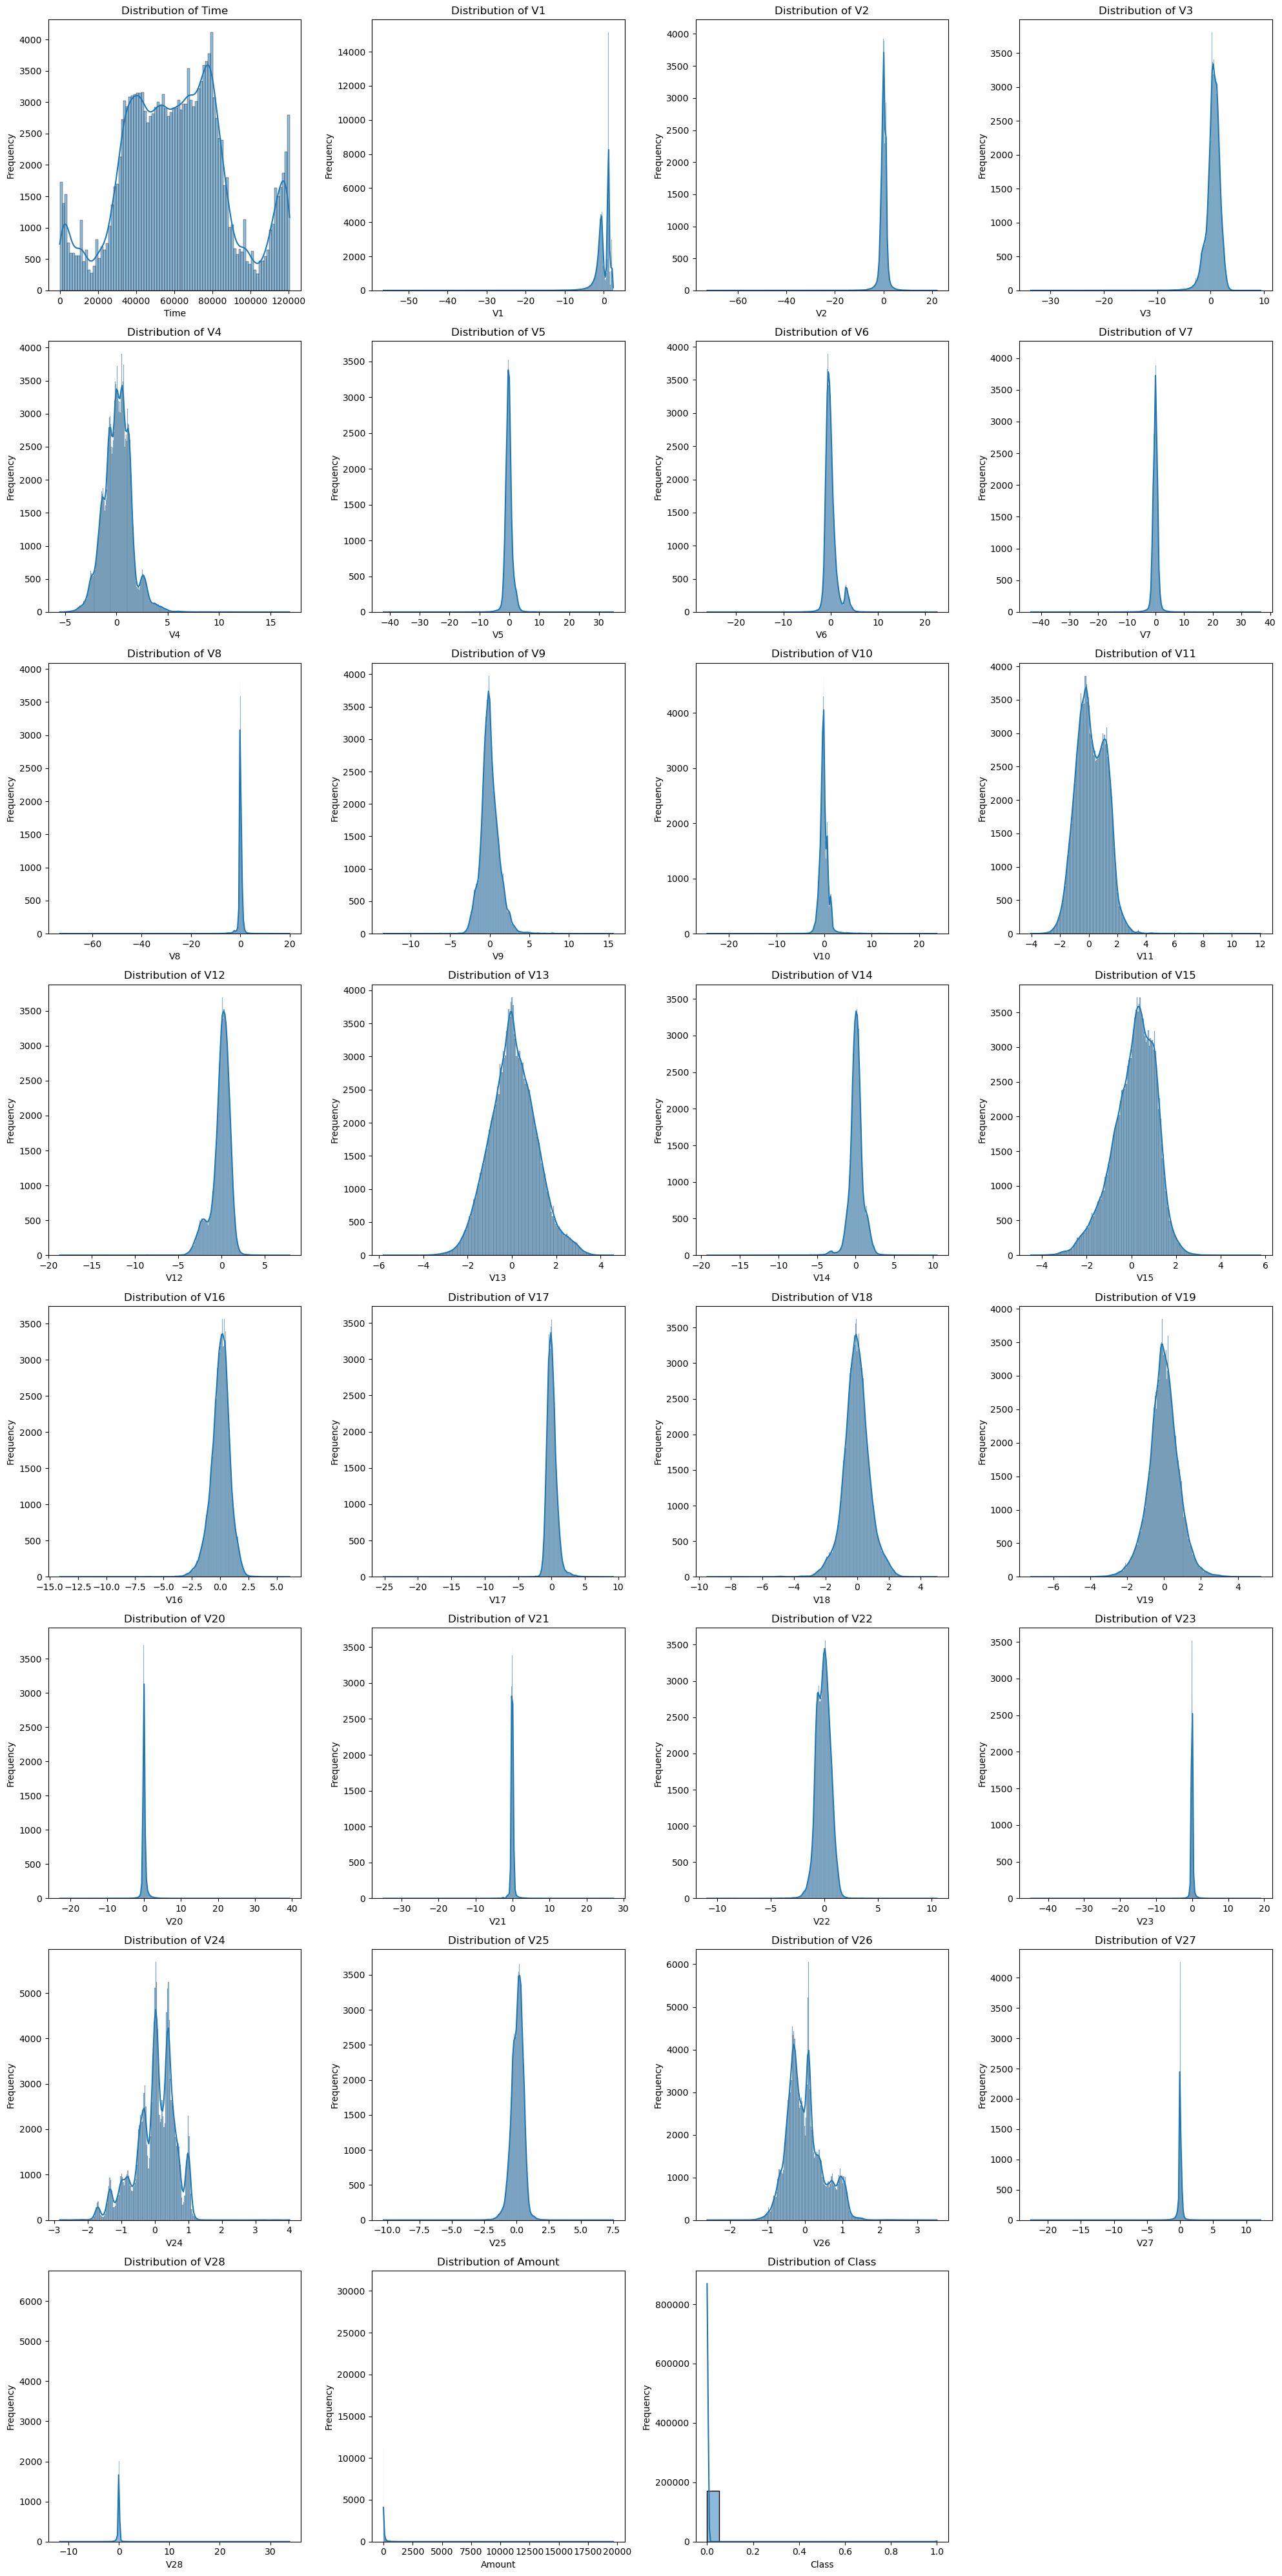

In [ ]:
train_df_no_id = train_df.drop('id', axis=1)

n_cols = 4
n_rows = (len(train_df_no_id.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(train_df_no_id.columns):
    sns.histplot(train_df_no_id[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

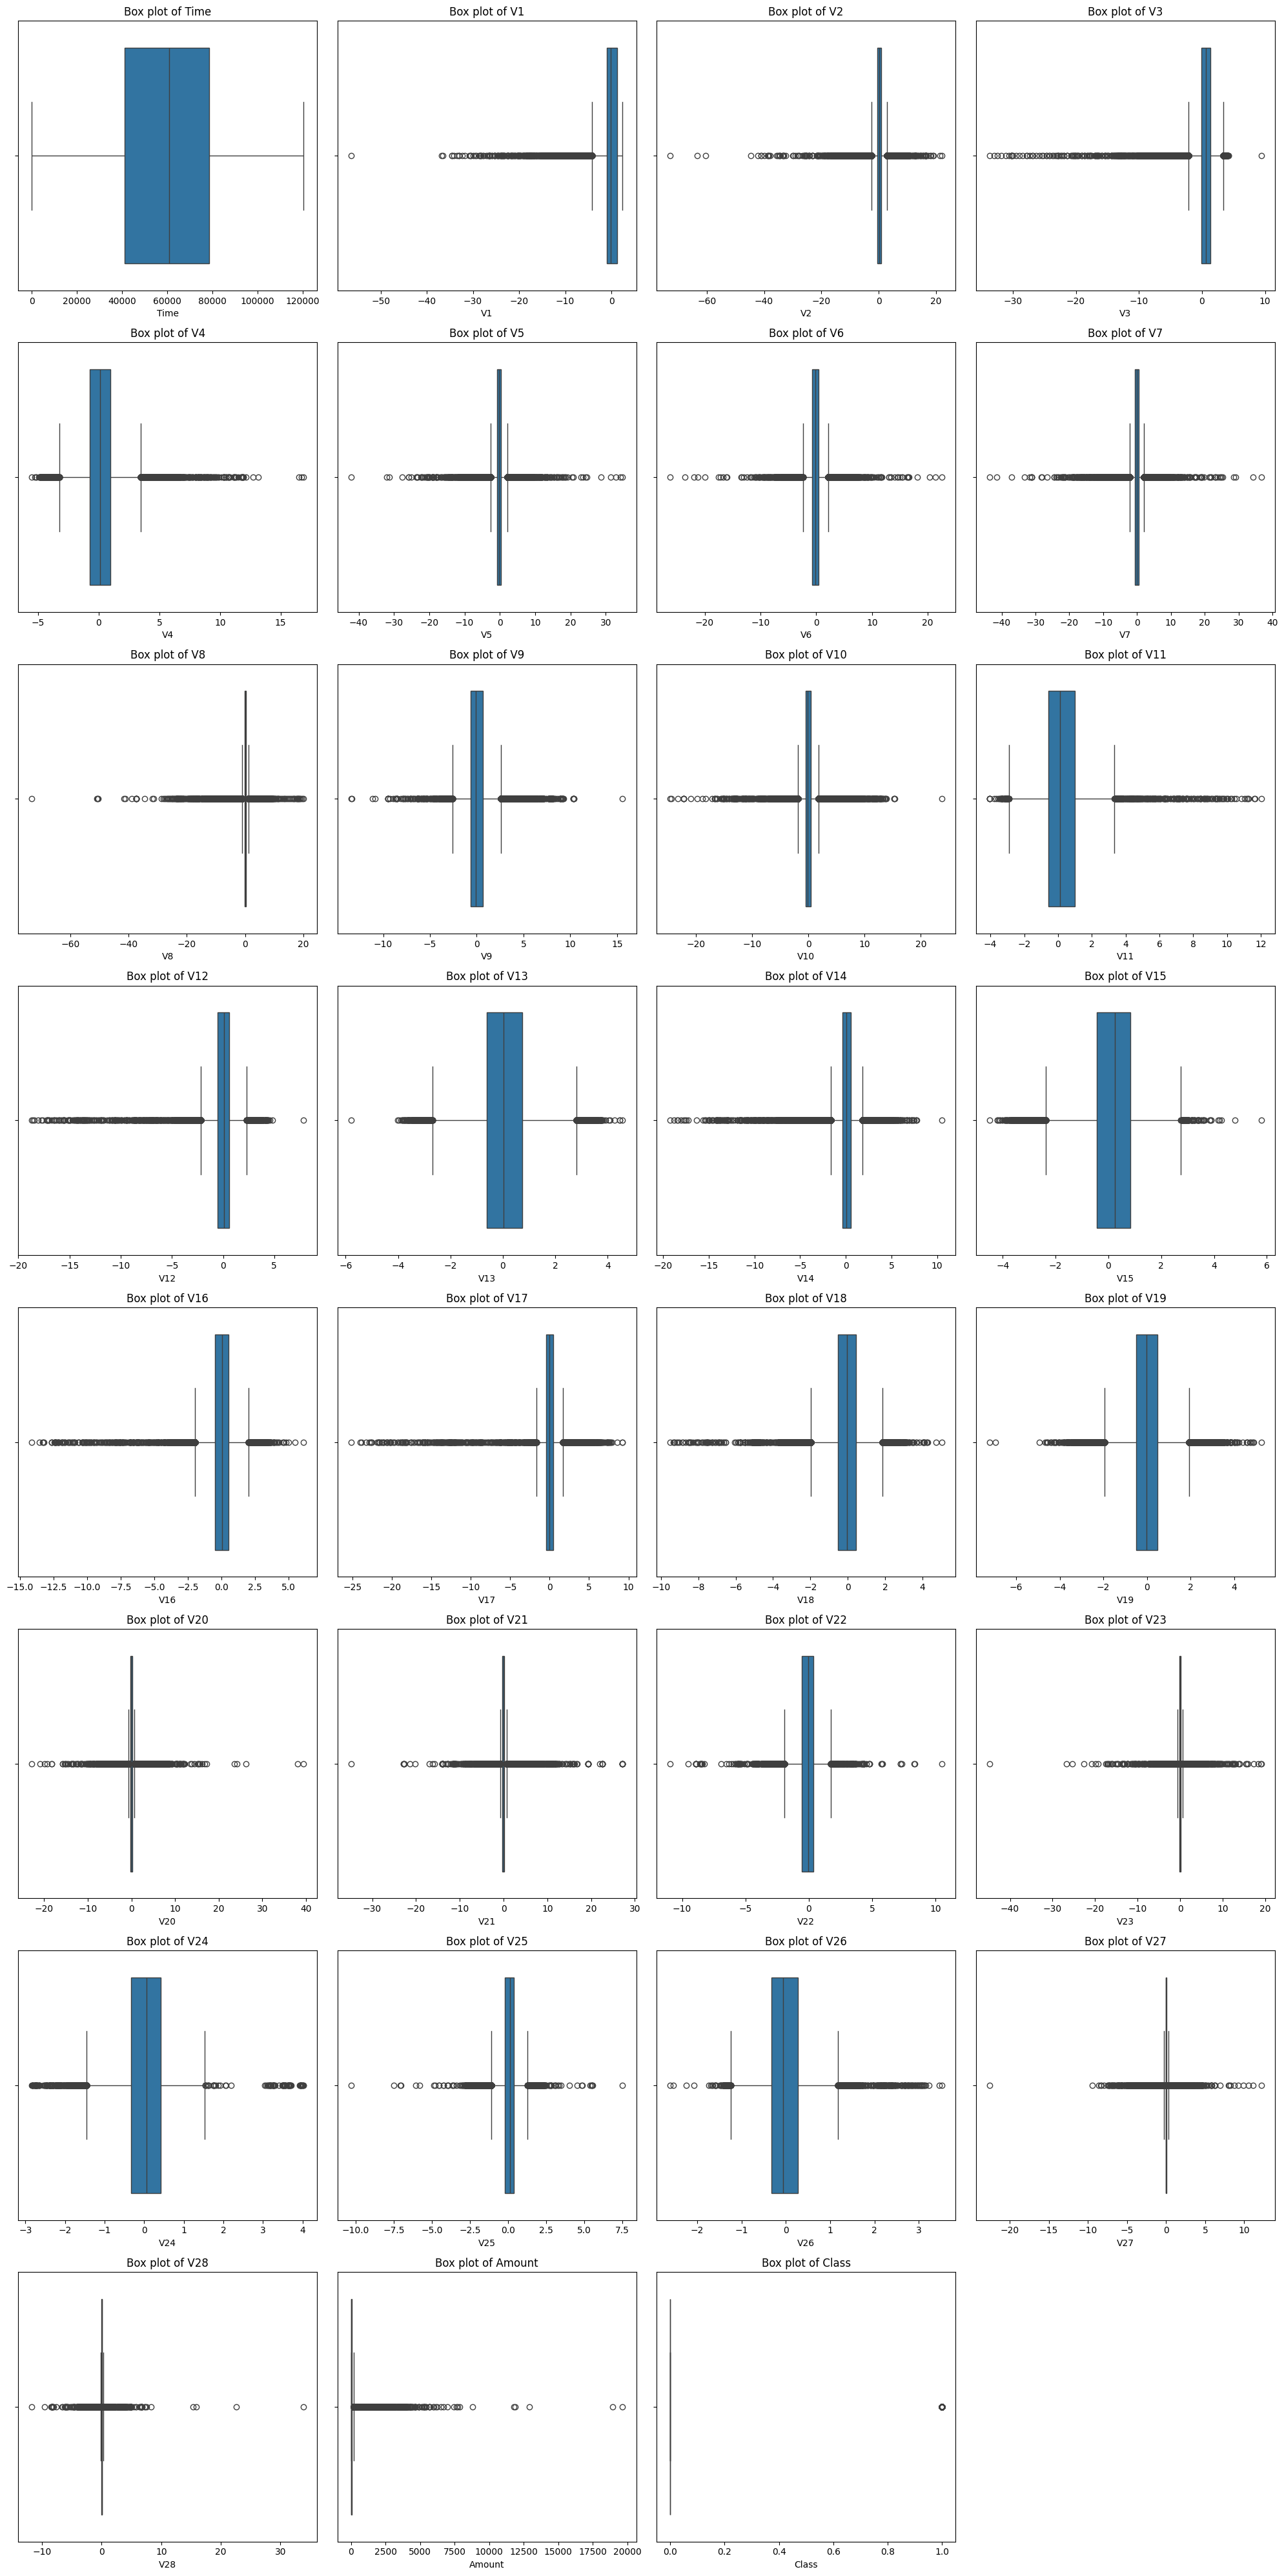

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'id' 칼럼 제외
numerical_cols_test = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_test.remove('id')

n_cols = 4
n_rows = (len(numerical_cols_test) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_test):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def count_outliers_iqr(df, column):
    """Counts outliers in a column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# 훈련 데이터 이상치 확인
print("훈련 데이터 칼럼별 이상치 개수 (IQR 기준):")
numerical_cols_train = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_train.remove('id')
if 'Class' in numerical_cols_train:
    numerical_cols_train.remove('Class')

for col in numerical_cols_train:
    outlier_count = count_outliers_iqr(train_df, col)
    print(f"{col}: {outlier_count} 개")

print("\n테스트 데이터 칼럼별 이상치 개수 (IQR 기준):")
# 테스트 데이터 이상치 확인
numerical_cols_test = test_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_test.remove('id')

for col in numerical_cols_test:
    outlier_count = count_outliers_iqr(train_df, col)
    print(f"{col}: {outlier_count} 개")

훈련 데이터 칼럼별 이상치 개수 (IQR 기준):
Time: 0 개
V1: 4376 개
V2: 8622 개
V3: 5529 개
V4: 3708 개
V5: 8991 개
V6: 13706 개
V7: 5668 개
V8: 14860 개
V9: 4674 개
V10: 6731 개
V11: 474 개
V12: 11267 개
V13: 2032 개
V14: 9455 개
V15: 2090 개
V16: 4316 개
V17: 4693 개
V18: 5767 개
V19: 4676 개
V20: 16637 개
V21: 10148 개
V22: 1437 개
V23: 12952 개
V24: 2808 개
V25: 3224 개
V26: 1703 개
V27: 24129 개
V28: 23483 개
Amount: 18923 개

테스트 데이터 칼럼별 이상치 개수 (IQR 기준):
Time: 0 개
V1: 4376 개
V2: 8622 개
V3: 5529 개
V4: 3708 개
V5: 8991 개
V6: 13706 개
V7: 5668 개
V8: 14860 개
V9: 4674 개
V10: 6731 개
V11: 474 개
V12: 11267 개
V13: 2032 개
V14: 9455 개
V15: 2090 개
V16: 4316 개
V17: 4693 개
V18: 5767 개
V19: 4676 개
V20: 16637 개
V21: 10148 개
V22: 1437 개
V23: 12952 개
V24: 2808 개
V25: 3224 개
V26: 1703 개
V27: 24129 개
V28: 23483 개
Amount: 18923 개


### 이상치들이 사기를 감지하는 중요 단서가 될수 있다는 판단에 제거하지 않기로

## 원핫~레이블 인코딩

(이미 PCA 된 데이터여서 해당없음)

## 상관관계
- 다중공선성 의심되면 VIF > 필요시 PCA 차원축소 진행

(PCA 된거라 무의미하지만 예의상)

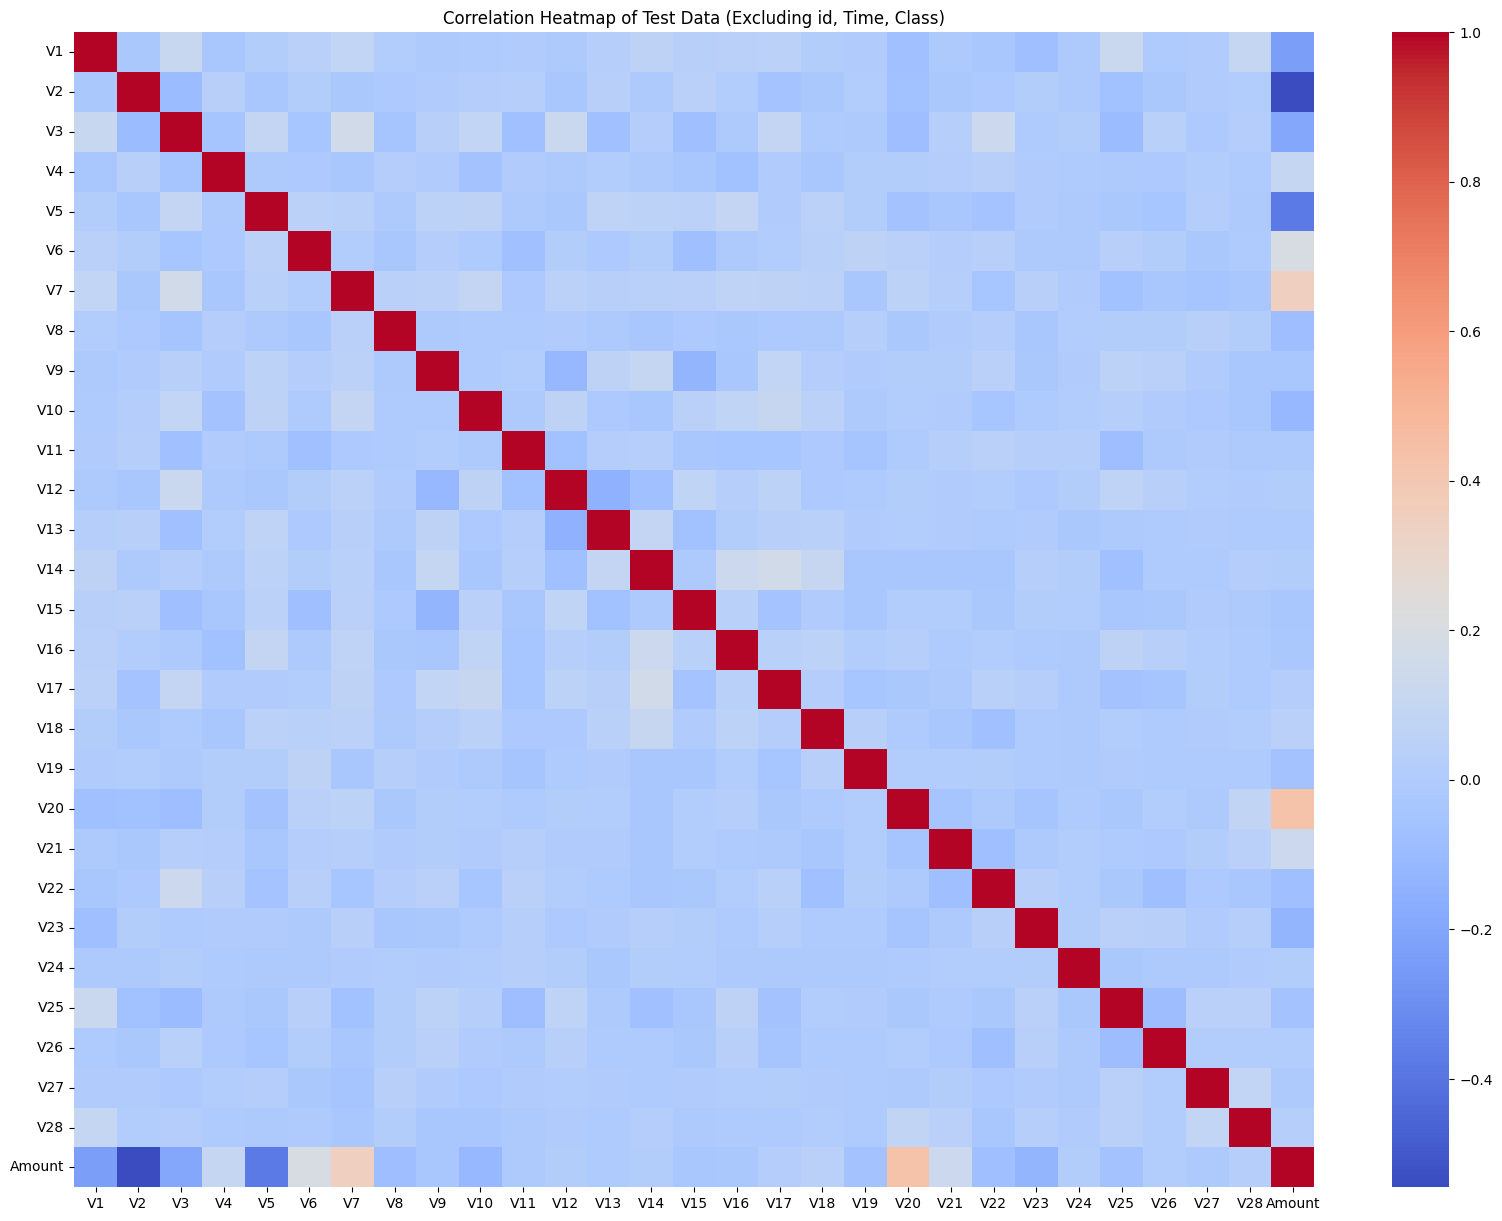

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'id', 'Time', 'Class' 칼럼 제외
cols_to_exclude = ['id', 'Time', 'Class']
train_df_corr = train_df.drop(columns=cols_to_exclude, errors='ignore')

# 상관관계 계산
corr_matrix_test = train_df_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_test, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Test Data (Excluding id, Time, Class)')
plt.show()

## 불필요 칼럼 drop

In [4]:
train_copy = train_df.copy()
train_copy.drop('Time', axis=1, inplace=True)
train_copy.drop('id', axis=1, inplace=True) # 유니크한 일련번호인 id값도 의미없다고 판단하여 drop

## 중복데이터 제거(했다가 rollback)
- RF+SMOTE 돌리니 스코어가 0.01 감소해서 쓰지 않기로

In [5]:
# print("중복 제거 전 train_copy 데이터 크기:", train_copy.shape)

# 중복된 행 제거
# train_copy.drop_duplicates(inplace=True)

# print("중복 제거 후 train_copy 데이터 크기:", train_copy.shape)

## 피쳐 스케일링: 스케일러

### StandardScaler 외에 다른 스케일러를 적용하면 결과가 달라질지 궁금하다?(아직 효과를 체감하지 못한)

In [6]:
from sklearn.preprocessing import StandardScaler

# 'Class' 칼럼을 제외한 피처 칼럼 선택
features_to_scale = train_copy.drop('Class', axis=1).columns

# StandardScaler 객체 생성
scaler = StandardScaler()

# 선택된 피처 칼럼에 대해 스케일링 적용
train_copy[features_to_scale] = scaler.fit_transform(train_copy[features_to_scale])

print("StandardScaler 적용 완료.")

StandardScaler 적용 완료.


## 오버~언더 샘플링
- 데이터 불균형 해소 (전체 모수 또는 특정 값이 너무 적은경우 등)

(지금은 실시하지 않고, 추후에 실행 고려하기로 미룸)
- 이후 Random Forest 결과를 보고 SMOTE 를 추가했음

## 데이터나 도메인 특성을 고려한 창의적인 피쳐 엔지니어링

- 레이블 식별 가능한게 Amount뿐인데, 나머지는 PCA로 의미를 비식별화 한거라 딱히 안보이는것 같다

# 모델링(모델별 학습 및 결과 확인)

In [7]:
# 피처와 타겟 분리
X_features = train_copy.iloc[:, :-1]
y_target = train_copy.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

# 피처와 타겟으로 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [9]:
print('학습 데이터 간 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('검증 데이터 간 레이블 값 비율')
print(y_val.value_counts()/y_val.shape[0] * 100)

학습 데이터 간 레이블 값 비율
Class
0    99.789329
1     0.210671
Name: count, dtype: float64
검증 데이터 간 레이블 값 비율
Class
0    99.789332
1     0.210668
Name: count, dtype: float64


## Logistic Regression 맛보기 테스트

In [ ]:
from sklearn.linear_model import LogisticRegression

# 학습
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# 검증
lr_val = lr_clf.predict(X_val)
lr_val_proba = lr_clf.predict_proba(X_val)[:,1]

print('학습 완료!')

학습 완료!


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_val_confusion = confusion_matrix(y_val, lr_val)
lr_val_accuracy = accuracy_score(y_val, lr_val)
lr_val_precision = precision_score(y_val, lr_val)
lr_val_recall = recall_score(y_val, lr_val)
lr_val_f1 = f1_score(y_val, lr_val)

lr_val_roc_score = roc_auc_score(y_val, lr_val_proba)
print(lr_val_roc_score)

print("검증 데이터 혼동행렬:")
print(lr_val_confusion)
print("검증 데이터 정확도: ",lr_val_accuracy)
print("검증 데이터 정밀도: ",lr_val_precision)
print("검증 데이터 재현율: ",lr_val_recall)
print("검증 데이터 F1 점수: ",lr_val_f1)
print("검증 데이터 AUC: ",lr_val_roc_score)


0.9761785499030771
검증 데이터 혼동행렬:
[[34092    13]
 [   28    44]]
검증 데이터 정확도:  0.9988003628170993
검증 데이터 정밀도:  0.7719298245614035
검증 데이터 재현율:  0.6111111111111112
검증 데이터 F1 점수:  0.6821705426356589
검증 데이터 AUC:  0.9761785499030771


## Logistic Regression, KNN, Decision Tree, Random Forest, Naive Bayes, SVM 동시 비교

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import pandas as pd

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42) # PR-AUC를 위해 probability=True 설정
}

results_no_smote = []

# 각 모델 학습 및 평가 (SMOTE 미적용)
for name, model in models.items():
    print(f"Training {name} (No SMOTE)...")
    # SMOTE를 적용하지 않은 훈련 데이터로 학습
    model.fit(X_train, y_train)

    # 검증 데이터로 예측
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # 평가 지표 계산
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)

    # PR-AUC 계산
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
    pr_auc = auc(recall_curve, precision_curve)

    results_no_smote.append({
        "Model": name,
        "Confusion Matrix": conf_matrix.tolist(), # 리스트로 변환하여 저장
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })
    print(f"{name} evaluation completed (No SMOTE).\n")

# 결과 표 생성
results_no_smote_df = pd.DataFrame(results_no_smote)

# 혼동 행렬은 별도로 출력하거나 필요에 따라 포맷팅
display(results_no_smote_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]])

# 각 모델의 혼동 행렬 별도 출력
# for result in results_no_smote:
#     print(f"Confusion Matrix for {result['Model']} (No SMOTE):\n{result['Confusion Matrix']}\n")

Training Logistic Regression (No SMOTE)...
Logistic Regression evaluation completed (No SMOTE).

Training KNN (No SMOTE)...
KNN evaluation completed (No SMOTE).

Training Decision Tree (No SMOTE)...
Decision Tree evaluation completed (No SMOTE).

Training Random Forest (No SMOTE)...
Random Forest evaluation completed (No SMOTE).

Training Naive Bayes (No SMOTE)...
Naive Bayes evaluation completed (No SMOTE).

Training SVM (No SMOTE)...
SVM evaluation completed (No SMOTE).



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.998800,0.771930,0.611111,0.682171,0.976179,0.759846
1,KNN,0.999473,0.965517,0.777778,0.861538,0.937381,0.891318
2,Decision Tree,0.999122,0.762500,0.847222,0.802632,0.923333,0.805022
3,Random Forest,0.999649,0.983871,0.847222,0.910448,0.942981,0.875852
4,Naive Bayes,0.976475,0.070423,0.833333,0.129870,0.958039,0.450037
5,SVM,0.999386,0.963636,0.736111,0.834646,0.938667,0.834939


 ## 앙상블1) Random Forest

### SMOTE 미적용

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import pandas as pd

# Random Forest 모델 정의
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

print(f"Training Random Forest (No SMOTE)...")
# SMOTE를 적용하지 않은 훈련 데이터로 학습
rf_clf.fit(X_train, y_train)

# 검증 데이터로 예측
y_val_pred = rf_clf.predict(X_val)
y_val_proba = rf_clf.predict_proba(X_val)[:, 1]

# 평가 지표 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

# PR-AUC 계산
precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
pr_auc = auc(recall_curve, precision_curve)

results_rf_no_smote = {
    "Model": "Random Forest (No SMOTE)",
    "Confusion Matrix": conf_matrix.tolist(), # 리스트로 변환하여 저장
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "PR-AUC": pr_auc
}
print(f"Random Forest evaluation completed (No SMOTE).\n")

# 결과 표 생성
results_rf_no_smote_df = pd.DataFrame([results_rf_no_smote])

# 혼동 행렬은 별도로 출력하거나 필요에 따라 포맷팅
display(results_rf_no_smote_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]])

# 혼동 행렬 별도 출력
# print(f"Confusion Matrix for Random Forest (No SMOTE):\n{results_rf_no_smote['Confusion Matrix']}\n")

Training Random Forest (No SMOTE)...
Random Forest evaluation completed (No SMOTE).



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,Random Forest (No SMOTE),0.999649,0.983871,0.847222,0.910448,0.942981,0.875852


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# Random Forest 모델을 사용하여 예측 (이진 예측값 사용)
# rf_clf는 SMOTE 미적용 데이터로 학습된 모델입니다.
rf_pred = rf_clf.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_rf = pd.DataFrame({
    "id": test_df["id"],
    "Class": rf_pred
})

# csv 파일 저장 - 구글 드라이브에 저장
submission_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_rf.csv", index=False)

print("Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf.csv) 생성 완료.")

Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf.csv) 생성 완료.


#### Random Forest 제출 0.76

### 데이터 불균형해소를 위해 SMOTE 적용

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
# random_state를 고정하여 결과 재현성을 확보합니다.
smote = SMOTE(random_state=42)

# 훈련 데이터에 SMOTE 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 완료.")
print("SMOTE 적용 전 학습 데이터 레이블 값 비율:")
print(y_train.value_counts()/y_train.shape[0] * 100)
print("\nSMOTE 적용 후 학습 데이터 레이블 값 비율:")
print(y_train_smote.value_counts()/y_train_smote.shape[0] * 100)

SMOTE 적용 완료.
SMOTE 적용 전 학습 데이터 레이블 값 비율:
Class
0    99.789329
1     0.210671
Name: count, dtype: float64

SMOTE 적용 후 학습 데이터 레이블 값 비율:
Class
0    50.0
1    50.0
Name: count, dtype: float64


SMOTE 적용한 Random Forest
- 코랩 4~5분 > n_jobs=-1 옵션추가후 2분대
- 로컬 8cores 15초

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import pandas as pd

# Random Forest 모델 정의
rf_clf_smote = RandomForestClassifier(n_jobs=-1, random_state=42)

print(f"Training Random Forest (With SMOTE)...")
# SMOTE가 적용된 훈련 데이터로 학습
rf_clf_smote.fit(X_train_smote, y_train_smote)

# 검증 데이터로 예측
y_val_pred_smote = rf_clf_smote.predict(X_val)
y_val_proba_smote = rf_clf_smote.predict_proba(X_val)[:, 1]

# 평가 지표 계산
conf_matrix_smote = confusion_matrix(y_val, y_val_pred_smote)
accuracy_smote = accuracy_score(y_val, y_val_pred_smote)
precision_smote = precision_score(y_val, y_val_pred_smote)
recall_smote = recall_score(y_val, y_val_pred_smote)
f1_smote = f1_score(y_val, y_val_pred_smote)
roc_auc_smote = roc_auc_score(y_val, y_val_proba_smote)

# PR-AUC 계산
precision_curve_smote, recall_curve_smote, _ = precision_recall_curve(y_val, y_val_proba_smote)
pr_auc_smote = auc(recall_curve_smote, precision_curve_smote)

results_rf_smote = {
    "Model": "Random Forest (With SMOTE)",
    "Confusion Matrix": conf_matrix_smote.tolist(), # 리스트로 변환하여 저장
    "Accuracy": accuracy_smote,
    "Precision": precision_smote,
    "Recall": recall_smote,
    "F1-Score": f1_smote,
    "ROC-AUC": roc_auc_smote,
    "PR-AUC": pr_auc_smote
}
print(f"Random Forest evaluation completed (With SMOTE).\n")

# 결과 표 생성
results_rf_smote_df = pd.DataFrame([results_rf_smote])

# 혼동 행렬은 별도로 출력하거나 필요에 따라 포맷팅
display(results_rf_smote_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]])

# 혼동 행렬 별도 출력
# print(f"Confusion Matrix for Random Forest (With SMOTE):\n{results_rf_smote['Confusion Matrix']}\n")

Training Random Forest (With SMOTE)...
Random Forest evaluation completed (With SMOTE).



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,Random Forest (With SMOTE),0.99962,0.940299,0.875,0.906475,0.97321,0.884048


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# SMOTE 적용 Random Forest 모델을 사용하여 예측 (이진 예측값 사용)
# rf_clf_smote는 SMOTE 적용 데이터로 학습된 모델입니다.
rf_smote_pred = rf_clf_smote.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_rf_smote = pd.DataFrame({
    "id": test_df["id"],
    "Class": rf_smote_pred
})

# csv 파일 저장 - 구글 드라이브에 저장
submission_rf_smote.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_rf_smote2.csv", index=False)

print("SMOTE 적용 Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf_smote.csv) 생성 완료.")

SMOTE 적용 Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf_smote.csv) 생성 완료.
파일 경로: /content/drive/MyDrive/Colab Notebooks/submission_rf_smote.csv


#### SMOTE 적용된 RF 제출 결과 : 0.84

#### 중복제거 해본 RF SMOTE 결과 : 0.83 (롤백)

#### 중요도 낮은 피쳐 제거로 속도(성능) 최적화 시도 : 0.82

RF 수행속도가 5분이나 걸려서 속도를 줄이고 싶은 마음에 성능 최적화 시도 했으나, 스코어가 0.84=>0.82로 0.02가 줄어서, 시도만 해보고 코드는 삭제함
- RF with SMOTE + 중요도 낮은 피쳐 제거 결과 : 0.82

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# SMOTE 적용 Random Forest 모델 (rf_clf_smote) 사용
# 검증 데이터의 예측 확률 사용
y_val_proba_smote = rf_clf_smote.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.4, 0.85, 0.05)
f1_scores_threshold = []

print("Threshold별 F1 스코어:")
for threshold in thresholds:
    # 임계값을 기준으로 이진 예측값 생성
    y_val_pred_threshold = (y_val_proba_smote > threshold).astype(int)

    # F1 스코어 계산
    f1 = f1_score(y_val, y_val_pred_threshold)
    f1_scores_threshold.append(f1)

    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")

# 결과 시각화 (선택 사항)
# import matplotlib.pyplot as plt
# plt.plot(thresholds, f1_scores_threshold, marker='o')
# plt.title('F1 Score vs Threshold for Random Forest (With SMOTE)')
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.grid(True)
# plt.show()

Threshold별 F1 스코어:
Threshold: 0.40, F1 Score: 0.9315
Threshold: 0.45, F1 Score: 0.9315
Threshold: 0.50, F1 Score: 0.9444
Threshold: 0.55, F1 Score: 0.9510
Threshold: 0.60, F1 Score: 0.9577
Threshold: 0.65, F1 Score: 0.9577
Threshold: 0.70, F1 Score: 0.9429
Threshold: 0.75, F1 Score: 0.9429
Threshold: 0.80, F1 Score: 0.9429


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# SMOTE 적용 Random Forest 모델을 사용하여 예측 확률을 얻습니다.
# rf_clf_smote는 SMOTE 적용 데이터로 학습된 모델입니다.
rf_smote_proba = rf_clf_smote.predict_proba(test_df_scaled)[:, 1]

# 임계값 0.6을 적용하여 이진 예측값 생성
optimal_threshold = 0.6
rf_smote_pred_threshold = (rf_smote_proba > optimal_threshold).astype(int)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_rf_smote_threshold = pd.DataFrame({
    "id": test_df["id"],
    "Class": rf_smote_pred_threshold
})

# csv 파일 저장 - 구글 드라이브에 저장
submission_rf_smote_threshold.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_rf_smote_threshold_0.6.csv", index=False)

print(f"SMOTE 적용 Random Forest 모델 (임계값 {optimal_threshold} 적용)을 사용한 테스트 데이터 예측 및 제출 파일 생성 완료.")
print("파일 경로: /content/drive/MyDrive/Colab Notebooks/submission_rf_smote_threshold_0.6.csv")

SMOTE 적용 Random Forest 모델 (임계값 0.6 적용)을 사용한 테스트 데이터 예측 및 제출 파일 생성 완료.
파일 경로: /content/drive/MyDrive/Colab Notebooks/submission_rf_smote_threshold_0.6.csv


#### 임계값을 0.5=>0.6 조정시 : 0.81로 낮아짐

## 앙상블2) LightGBM + 하이퍼 파라미터 튜닝

### SMOTE 미적용 ver

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc

# LightGBM 모델 정의
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=150)

# 학습 및 검증 데이터 설정 (SMOTE 미적용 데이터 사용)
eval_set = [(X_train, y_train), (X_val, y_val)]

lgbm_clf.fit(X_train, y_train,
              eval_metric='auc',
              eval_set=eval_set)

# 검증 데이터에 대한 ROC AUC, F1, PR-AUC 계산
y_val_pred = lgbm_clf.predict(X_val)
y_val_proba = lgbm_clf.predict_proba(X_val)[:,1]

lgbm_roc_score = roc_auc_score(y_val, y_val_proba)
lgbm_f1_score = f1_score(y_val, y_val_pred)
precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
lgbm_pr_auc = auc(recall, precision)

print('검증 데이터 ROC AUC: {0:.4f}'.format(lgbm_roc_score))
print('검증 데이터 F1 Score: {0:.4f}'.format(lgbm_f1_score))
print('검증 데이터 PR-AUC: {0:.4f}'.format(lgbm_pr_auc))

[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Number of positive: 288, number of negative: 136418
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 136706, number of used features: 29
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002107 -> initscore=-6.160519
[LightGBM] [Info] Start training from score -6.160519
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.968055	training's binary_logloss: 0.0111208	valid_1's auc: 0.950452	valid_1's binary_logloss: 0.0146661
검증 데이터 RO

In [ ]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
from hyperopt import hp
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import f1_score # F1 스코어를 임포트합니다.
import numpy as np

def objective_func(search_space):
    # SMOTE를 적용하지 않은 기본 데이터 사용
    X_train_base = X_train
    y_train_base = y_train

    lgbm_clf =  LGBMClassifier(n_estimators=100, # n_estimators는 여기서 고정
                               num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']),
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'],
                               early_stopping_rounds=150,
                               verbose=-1 # 학습 과정 출력 안 함
                              )
    # 3개 k-fold 방식으로 평가된 f1 지표를 담는 list
    f1_list = [] # roc_auc_list 대신 f1_list를 사용합니다.

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train_base):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train_base.iloc[tr_index], y_train_base.iloc[tr_index]
        X_val_fold, y_val_fold = X_train_base.iloc[val_index], y_train_base.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LightGBM 학습 수행.
        # early stopping 기준을 AUC에서 F1으로 변경할 수 있지만, LightGBM의 early stopping은 일반적으로
        # binary logloss나 AUC를 기준으로 합니다. 여기서는 AUC로 early stopping을 하되,
        # 목적 함수는 F1 score를 사용하겠습니다.
        lgbm_clf.fit(X_tr, y_tr,
                      eval_set=[(X_tr, y_tr), (X_val_fold, y_val_fold)],
                      eval_metric='auc', # Early stopping 기준은 AUC 유지
                     )

        # 예측값 추출 후 f1 score 계산하고 평균 f1 score 계산을 위해 list에 결과값 담음.
        y_val_pred_fold = lgbm_clf.predict(X_val_fold) # 예측값 사용
        score = f1_score(y_val_fold, y_val_pred_fold) # F1 score 계산
        f1_list.append(score) # f1_list에 결과값 담음

    # 3개 k-fold로 계산된 f1값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(f1_list) # 평균 F1 score의 음수 값을 반환

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np # numpy 임포트 추가

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best_lgbm = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best_lgbm:', best_lgbm)

100%|██████████| 50/50 [10:02<00:00, 12.06s/trial, best loss: -0.8572167451178813]
best_lgbm: {'learning_rate': np.float64(0.02847231911756847), 'max_depth': np.float64(150.0), 'min_child_samples': np.float64(66.0), 'num_leaves': np.float64(55.0), 'subsample': np.float64(0.8058645796641881)}


50회에 7분 소요 되었었음(코랩) => 10분으로 늘어났다? 설정들이 좀 바뀌며?

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc
from lightgbm import LGBMClassifier, early_stopping

# Hyperopt로 찾은 최적 하이퍼파라미터로 LightGBM 모델 정의
lgbm_clf_tuned =  LGBMClassifier(n_estimators=500, num_leaves=int(best_lgbm['num_leaves']),
                                  max_depth=int(best_lgbm['max_depth']),
                                  min_child_samples=int(best_lgbm['min_child_samples']),
                                  subsample=round(best_lgbm['subsample'], 5),
                                  learning_rate=round(best_lgbm['learning_rate'], 5),
                                  early_stopping_rounds=150,
                                  verbose=-1 # 학습 과정 출력 안 함
                                 )

# SMOTE 미적용 데이터로 학습 및 검증 데이터 설정
eval_set = [(X_train, y_train), (X_val, y_val)]

lgbm_clf_tuned.fit(X_train, y_train,
                    eval_set=eval_set,
                    eval_metric='auc', # early stopping 기준은 AUC 유지
                   )

# 검증 데이터에 대한 F1 score, ROC AUC, PR-AUC 계산
y_val_pred_tuned = lgbm_clf_tuned.predict(X_val)
y_val_proba_tuned = lgbm_clf_tuned.predict_proba(X_val)[:, 1]

f1_tuned = f1_score(y_val, y_val_pred_tuned)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_tuned)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_val, y_val_proba_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)


print('튜닝된 LightGBM 모델 검증 결과:')
print('F1 Score: {0:.4f}'.format(f1_tuned))
print('ROC AUC: {0:.4f}'.format(roc_auc_tuned))
print('PR-AUC: {0:.4f}'.format(pr_auc_tuned))

튜닝된 LightGBM 모델 검증 결과:
F1 Score: 0.9000
ROC AUC: 0.9497
PR-AUC: 0.8788


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# 튜닝된 LightGBM 모델을 사용하여 예측 (이진 예측값 사용)
# predict를 사용하여 0 또는 1로 예측합니다.
lgbm_tuned_pred = lgbm_clf_tuned.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission = pd.DataFrame({
    "id": test_df["id"],
    "Class": lgbm_tuned_pred
})

# csv 파일 저장 - Google Drive
# submission.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_lightgbm_non_smote.csv", index=False)
# csv 파일 저장 - Kaggle
# submission.to_csv("/kaggle/working/submission.csv", index=False)
# csv 파일 저장 - Local
submission.to_csv("C:/Users/power/Downloads/submission_lightgbm_non_smote.csv", index=False)


print("튜닝된 LightGBM 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission.csv) 생성 완료.")


OSError: Cannot save file into a non-existent directory: '/kaggle/working'

#### 최초 캐글 써밋--LightGBM no_smote : 0.72

### SMOTE 적용 ver

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc

# LightGBM 모델 정의
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=150)

# 학습 및 검증 데이터 설정 (SMOTE 미적용 데이터 사용)
eval_set = [(X_train_smote, y_train_smote), (X_val, y_val)]

lgbm_clf.fit(X_train_smote, y_train_smote,
              eval_metric='auc',
              eval_set=eval_set)

# 검증 데이터에 대한 ROC AUC, F1, PR-AUC 계산
y_val_pred = lgbm_clf.predict(X_val)
y_val_proba = lgbm_clf.predict_proba(X_val)[:,1]

lgbm_roc_score = roc_auc_score(y_val, y_val_proba)
lgbm_f1_score = f1_score(y_val, y_val_pred)
precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
lgbm_pr_auc = auc(recall, precision)

print('검증 데이터 ROC AUC: {0:.4f}'.format(lgbm_roc_score))
print('검증 데이터 F1 Score: {0:.4f}'.format(lgbm_f1_score))
print('검증 데이터 PR-AUC: {0:.4f}'.format(lgbm_pr_auc))

[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Number of positive: 136418, number of negative: 136418
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 272836, number of used features: 29
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[154]	training's auc: 1	training's binary_logloss: 0.000238607	valid_1's auc: 0.987308	valid_1's binary_logloss: 0.00375671
검증 데이터 ROC AUC: 0.9873
검증 데이터 F1 Score: 0.8552
검증 데이터 PR-AUC: 0

In [ ]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
from hyperopt import hp
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import f1_score # F1 스코어를 임포트합니다.
import numpy as np

def objective_func(search_space):
    # SMOTE를 적용한 데이터 사용
    X_train_base = X_train_smote
    y_train_base = y_train_smote

    lgbm_clf =  LGBMClassifier(n_estimators=100, # n_estimators는 여기서 고정
                               num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']),
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'],
                               early_stopping_rounds=150,
                               verbose=-1 # 학습 과정 출력 안 함
                              )
    # 3개 k-fold 방식으로 평가된 f1 지표를 담는 list
    f1_list = [] # roc_auc_list 대신 f1_list를 사용합니다.

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train_base):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train_base.iloc[tr_index], y_train_base.iloc[tr_index]
        X_val_fold, y_val_fold = X_train_base.iloc[val_index], y_train_base.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LightGBM 학습 수행.
        # early stopping 기준을 AUC에서 F1으로 변경할 수 있지만, LightGBM의 early stopping은 일반적으로
        # binary logloss나 AUC를 기준으로 합니다. 여기서는 AUC로 early stopping을 하되,
        # 목적 함수는 F1 score를 사용하겠습니다.
        lgbm_clf.fit(X_tr, y_tr,
                      eval_set=[(X_tr, y_tr), (X_val_fold, y_val_fold)],
                      eval_metric='auc', # Early stopping 기준은 AUC 유지
                     )

        # 예측값 추출 후 f1 score 계산하고 평균 f1 score 계산을 위해 list에 결과값 담음.
        y_val_pred_fold = lgbm_clf.predict(X_val_fold) # 예측값 사용
        score = f1_score(y_val_fold, y_val_pred_fold) # F1 score 계산
        f1_list.append(score) # f1_list에 결과값 담음

    # 3개 k-fold로 계산된 f1값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(f1_list) # 평균 F1 score의 음수 값을 반환

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np # numpy 임포트 추가

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best_lgbm = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=200, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best_lgbm:', best_lgbm)

100%|██████████| 200/200 [14:19<00:00,  4.30s/trial, best loss: -0.9998389066952464]
best_lgbm: {'learning_rate': np.float64(0.18913619781514077), 'max_depth': np.float64(100.0), 'min_child_samples': np.float64(95.0), 'num_leaves': np.float64(50.0), 'subsample': np.float64(0.7130088508901621)}


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc
from lightgbm import LGBMClassifier, early_stopping

# Hyperopt로 찾은 최적 하이퍼파라미터로 LightGBM 모델 정의
lgbm_clf_tuned =  LGBMClassifier(n_estimators=500, num_leaves=int(best_lgbm['num_leaves']),
                                  max_depth=int(best_lgbm['max_depth']),
                                  min_child_samples=int(best_lgbm['min_child_samples']),
                                  subsample=round(best_lgbm['subsample'], 5),
                                  learning_rate=round(best_lgbm['learning_rate'], 5),
                                  early_stopping_rounds=150,
                                  verbose=-1 # 학습 과정 출력 안 함
                                 )

# SMOTE 적용 데이터로 학습 및 검증 데이터 설정
eval_set = [(X_train_smote, y_train_smote), (X_val, y_val)]

lgbm_clf_tuned.fit(X_train_smote, y_train_smote,
                    eval_set=eval_set,
                    eval_metric='auc', # early stopping 기준은 AUC 유지
                   )

# 검증 데이터에 대한 F1 score, ROC AUC, PR-AUC 계산
y_val_pred_tuned = lgbm_clf_tuned.predict(X_val)
y_val_proba_tuned = lgbm_clf_tuned.predict_proba(X_val)[:, 1]

f1_tuned = f1_score(y_val, y_val_pred_tuned)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_tuned)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_val, y_val_proba_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)


print('튜닝된 LightGBM 모델 검증 결과:')
print('F1 Score: {0:.4f}'.format(f1_tuned))
print('ROC AUC: {0:.4f}'.format(roc_auc_tuned))
print('PR-AUC: {0:.4f}'.format(pr_auc_tuned))

튜닝된 LightGBM 모델 검증 결과:
F1 Score: 0.8552
ROC AUC: 0.9819
PR-AUC: 0.8807


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# 튜닝된 LightGBM 모델을 사용하여 예측 (이진 예측값 사용)
# predict를 사용하여 0 또는 1로 예측합니다.
lgbm_tuned_pred = lgbm_clf_tuned.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission = pd.DataFrame({
    "id": test_df["id"],
    "Class": lgbm_tuned_pred
})

# csv 파일 저장 - 구글 드라이브에 저장하는 경우
# submission.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_lightgbm_smote.csv", index=False)
# csv 파일 저장 - 캐글에 저장
# submission.to_csv("/kaggle/working/submission.csv", index=False)
# csv 파일 저장 - Local
submission.to_csv("C:/Users/power/Downloads/submission_lightgbm_smote_tuned.csv", index=False)

print("튜닝된 LightGBM 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission.csv) 생성 완료.")


튜닝된 LightGBM 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission.csv) 생성 완료.


#### LightGBM+Opt+Smote_10times : 0.77

#### LightGBM+Opt+Smote_50times : 0.78

#### LightGBM+Opt+Smote_200times : 0.78

## 앙상블3) XGBoost + 하이퍼 파라미터 튜닝 시도

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import pandas as pd

# XGBoost 모델 정의
# 불균형 데이터셋에 대해 scale_pos_weight를 설정할 수 있지만, SMOTE로 이미 균형을 맞췄으므로 기본 설정 사용
xgb_clf_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')


print(f"Training XGBoost (With SMOTE)...")
# SMOTE가 적용된 훈련 데이터로 학습
xgb_clf_smote.fit(X_train_smote, y_train_smote)

# 검증 데이터로 예측
y_val_pred_smote = xgb_clf_smote.predict(X_val)
y_val_proba_smote = xgb_clf_smote.predict_proba(X_val)[:, 1]

# 평가 지표 계산
conf_matrix_smote = confusion_matrix(y_val, y_val_pred_smote)
accuracy_smote = accuracy_score(y_val, y_val_pred_smote)
precision_smote = precision_score(y_val, y_val_pred_smote)
recall_smote = recall_score(y_val, y_val_pred_smote)
f1_smote = f1_score(y_val, y_val_pred_smote)
roc_auc_smote = roc_auc_score(y_val, y_val_proba_smote)

# PR-AUC 계산
precision_curve_smote, recall_curve_smote, _ = precision_recall_curve(y_val, y_val_proba_smote)
pr_auc_smote = auc(recall_curve_smote, precision_curve_smote)

results_xgb_smote = {
    "Model": "XGBoost (With SMOTE)",
    "Confusion Matrix": conf_matrix_smote.tolist(), # 리스트로 변환하여 저장
    "Accuracy": accuracy_smote,
    "Precision": precision_smote,
    "Recall": recall_smote,
    "F1-Score": f1_smote,
    "ROC-AUC": roc_auc_smote,
    "PR-AUC": pr_auc_smote
}
print(f"XGBoost evaluation completed (With SMOTE).\n")

# 결과 표 생성
results_xgb_smote_df = pd.DataFrame([results_xgb_smote])

# 혼동 행렬은 별도로 출력하거나 필요에 따라 포맷팅
display(results_xgb_smote_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]])

# 혼동 행렬 별도 출력
# print(f"Confusion Matrix for XGBoost (With SMOTE):\n{results_xgb_smote['Confusion Matrix']}\n")

Training XGBoost (With SMOTE)...


c:\Users\power\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:47:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost evaluation completed (With SMOTE).



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,XGBoost (With SMOTE),0.999444,0.863014,0.875,0.868966,0.982838,0.886193


In [ ]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'subsample': hp.uniform('subsample', 0.6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1)
}

In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import numpy as np

def objective_func(search_space):
    # SMOTE를 적용한 훈련 데이터 사용
    X_train_base = X_train_smote
    y_train_base = y_train_smote

    xgb_clf =  XGBClassifier(n_estimators=int(search_space['n_estimators']),
                             max_depth=int(search_space['max_depth']),
                             learning_rate=search_space['learning_rate'],
                             gamma=search_space['gamma'],
                             subsample=search_space['subsample'],
                             colsample_bytree=search_space['colsample_bytree'],
                             random_state=42,
                             use_label_encoder=False, # Keep for compatibility with older versions if needed
                             early_stopping_rounds=100,
                             eval_metric='auc',
                             verbose=-1 # 학습 과정 출력 안 함
                             )

    # 3개 k-fold 방식으로 평가된 f1 지표를 담는 list
    f1_list = []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # X_train_smote를 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train_base):
        # kf.split(X_train_smote)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train_base.iloc[tr_index], y_train_base.iloc[tr_index]
        X_val_fold, y_val_fold = X_train_base.iloc[val_index], y_train_base.iloc[val_index]

        xgb_clf.fit(X_tr, y_tr,
                    eval_set=[(X_val_fold, y_val_fold)], # 검증 데이터 전달
                    verbose=False # early stopping 과정 출력 안 함
                   )

        # 예측값 추출 후 f1 score 계산하고 평균 f1 score 계산을 위해 list에 결과값 담음.
        y_val_pred_fold = xgb_clf.predict(X_val_fold)
        score = f1_score(y_val_fold, y_val_pred_fold)
        f1_list.append(score)

    # 3개 k-fold로 계산된 f1값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(f1_list) # 평균 F1 score의 음수 값을 반환

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best_xgb = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest,
            max_evals=200, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=42)) # 시드 변경

print('best_xgb:', best_xgb)

  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  0%|          | 1/200 [00:11<36:53, 11.12s/trial, best loss: -0.9997693754563279]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:47:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  1%|          | 2/200 [00:25<43:52, 13.29s/trial, best loss: -0.9997693754563279]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  2%|▏         | 3/200 [00:32<32:49, 10.00s/trial, best loss: -0.9997693754563279]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  2%|▏         | 4/200 [00:40<30:23,  9.30s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  2%|▎         | 5/200 [00:46<26:06,  8.03s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  3%|▎         | 6/200 [00:51<23:40,  7.32s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  4%|▎         | 7/200 [01:07<32:37, 10.14s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:48:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  4%|▍         | 8/200 [01:25<39:50, 12.45s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  4%|▍         | 9/200 [01:38<40:33, 12.74s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  5%|▌         | 10/200 [01:49<38:42, 12.23s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  6%|▌         | 11/200 [01:53<30:32,  9.69s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  6%|▌         | 12/200 [02:05<32:44, 10.45s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  6%|▋         | 13/200 [02:21<37:29, 12.03s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  7%|▋         | 14/200 [02:32<35:53, 11.58s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  8%|▊         | 15/200 [02:47<39:03, 12.67s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  8%|▊         | 16/200 [03:04<43:07, 14.06s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  8%|▊         | 17/200 [03:16<41:20, 13.56s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:50:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  9%|▉         | 18/200 [03:22<34:11, 11.27s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|▉         | 19/200 [03:38<38:14, 12.67s/trial, best loss: -0.9997802436048939]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|█         | 20/200 [03:55<41:24, 13.80s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|█         | 21/200 [04:05<38:10, 12.80s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 11%|█         | 22/200 [04:16<35:42, 12.04s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:51:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 12%|█▏        | 23/200 [04:24<31:57, 10.84s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 12%|█▏        | 24/200 [04:35<32:01, 10.92s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 12%|█▎        | 25/200 [04:42<28:56,  9.92s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 13%|█▎        | 26/200 [04:50<27:14,  9.39s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 14%|█▎        | 27/200 [05:07<33:10, 11.51s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:52:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 14%|█▍        | 28/200 [05:23<37:09, 12.96s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 14%|█▍        | 29/200 [05:39<39:00, 13.68s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 15%|█▌        | 30/200 [05:55<40:55, 14.44s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 16%|█▌        | 31/200 [06:09<40:45, 14.47s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:53:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 16%|█▌        | 32/200 [06:30<45:51, 16.38s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 16%|█▋        | 33/200 [06:47<46:07, 16.57s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 17%|█▋        | 34/200 [06:59<41:56, 15.16s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 18%|█▊        | 35/200 [07:17<44:12, 16.08s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:54:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 18%|█▊        | 36/200 [07:33<43:42, 15.99s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 18%|█▊        | 37/200 [07:48<42:41, 15.71s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 19%|█▉        | 38/200 [08:02<40:50, 15.13s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:55:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|█▉        | 39/200 [08:21<43:29, 16.21s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|██        | 40/200 [08:32<39:36, 14.85s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|██        | 41/200 [08:46<38:19, 14.46s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 21%|██        | 42/200 [09:01<38:48, 14.73s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:56:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 22%|██▏       | 43/200 [09:22<43:07, 16.48s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 22%|██▏       | 44/200 [09:34<39:46, 15.30s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 22%|██▎       | 45/200 [09:50<40:00, 15.49s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 23%|██▎       | 46/200 [10:02<36:52, 14.37s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 24%|██▎       | 47/200 [10:18<37:47, 14.82s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:57:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 24%|██▍       | 48/200 [10:36<39:52, 15.74s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 24%|██▍       | 49/200 [10:48<37:09, 14.76s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 25%|██▌       | 50/200 [10:53<29:06, 11.64s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 26%|██▌       | 51/200 [11:06<30:29, 12.28s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 26%|██▌       | 52/200 [11:15<27:14, 11.05s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:58:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 26%|██▋       | 53/200 [11:28<28:53, 11.79s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 27%|██▋       | 54/200 [11:44<31:26, 12.92s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 28%|██▊       | 55/200 [11:57<31:32, 13.05s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 28%|██▊       | 56/200 [12:13<33:18, 13.88s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:59:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 28%|██▊       | 57/200 [12:30<35:27, 14.88s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 29%|██▉       | 58/200 [12:44<34:48, 14.71s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|██▉       | 59/200 [12:55<32:02, 13.63s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|███       | 60/200 [13:03<27:25, 11.75s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|███       | 61/200 [13:18<29:53, 12.91s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:00:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 31%|███       | 62/200 [13:30<29:03, 12.63s/trial, best loss: -0.9997912385353688]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 32%|███▏      | 63/200 [13:45<30:14, 13.24s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 32%|███▏      | 64/200 [13:58<30:01, 13.24s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 32%|███▎      | 65/200 [14:05<25:29, 11.33s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:01:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 33%|███▎      | 66/200 [14:21<28:37, 12.82s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 34%|███▎      | 67/200 [14:37<30:08, 13.60s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 34%|███▍      | 68/200 [14:51<30:33, 13.89s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 34%|███▍      | 69/200 [15:12<34:57, 16.02s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:02:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 35%|███▌      | 70/200 [15:27<34:04, 15.73s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 36%|███▌      | 71/200 [15:41<32:20, 15.05s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 36%|███▌      | 72/200 [15:58<33:32, 15.73s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 36%|███▋      | 73/200 [16:17<35:01, 16.55s/trial, best loss: -0.9997949157224086]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:03:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 37%|███▋      | 74/200 [16:35<35:39, 16.98s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 38%|███▊      | 75/200 [16:52<35:35, 17.08s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 38%|███▊      | 76/200 [17:09<35:05, 16.98s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:04:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 38%|███▊      | 77/200 [17:26<35:06, 17.13s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 39%|███▉      | 78/200 [17:42<34:16, 16.86s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|███▉      | 79/200 [17:57<32:51, 16.29s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|████      | 80/200 [18:12<31:41, 15.85s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|████      | 81/200 [18:20<26:43, 13.47s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 41%|████      | 82/200 [18:36<28:06, 14.29s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 42%|████▏     | 83/200 [18:50<27:13, 13.96s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 42%|████▏     | 84/200 [19:06<28:10, 14.57s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 42%|████▎     | 85/200 [19:23<29:25, 15.36s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 43%|████▎     | 86/200 [19:27<22:53, 12.04s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 44%|████▎     | 87/200 [19:33<19:20, 10.27s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 44%|████▍     | 88/200 [19:48<21:28, 11.50s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 44%|████▍     | 89/200 [20:03<23:42, 12.81s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 45%|████▌     | 90/200 [20:19<24:46, 13.51s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:07:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 46%|████▌     | 91/200 [20:33<25:08, 13.84s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 46%|████▌     | 92/200 [20:42<21:55, 12.18s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 46%|████▋     | 93/200 [20:51<20:32, 11.52s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 47%|████▋     | 94/200 [21:06<21:52, 12.38s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 48%|████▊     | 95/200 [21:19<22:17, 12.74s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:08:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 48%|████▊     | 96/200 [21:27<19:16, 11.12s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 48%|████▊     | 97/200 [21:40<20:07, 11.72s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 49%|████▉     | 98/200 [21:52<19:58, 11.75s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|████▉     | 99/200 [22:04<19:51, 11.80s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|█████     | 100/200 [22:18<21:05, 12.65s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:09:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|█████     | 101/200 [22:31<20:48, 12.61s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 51%|█████     | 102/200 [22:41<19:12, 11.76s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 52%|█████▏    | 103/200 [22:53<19:28, 12.05s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 52%|█████▏    | 104/200 [23:07<19:53, 12.43s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 52%|█████▎    | 105/200 [23:22<20:52, 13.18s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 53%|█████▎    | 106/200 [23:38<22:23, 14.29s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 54%|█████▎    | 107/200 [23:48<19:58, 12.89s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 54%|█████▍    | 108/200 [23:52<15:46, 10.29s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 55%|█████▍    | 109/200 [23:59<13:45,  9.08s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 55%|█████▌    | 110/200 [24:12<15:28, 10.32s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:11:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 56%|█████▌    | 111/200 [24:25<16:42, 11.26s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 56%|█████▌    | 112/200 [24:35<15:51, 10.82s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 56%|█████▋    | 113/200 [24:48<16:49, 11.60s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 57%|█████▋    | 114/200 [25:04<18:14, 12.73s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 57%|█████▊    | 115/200 [25:19<19:03, 13.46s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:12:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 58%|█████▊    | 116/200 [25:29<17:28, 12.48s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 58%|█████▊    | 117/200 [25:41<16:58, 12.27s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 59%|█████▉    | 118/200 [25:50<15:21, 11.24s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|█████▉    | 119/200 [26:06<17:07, 12.68s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|██████    | 120/200 [26:20<17:37, 13.22s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:13:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|██████    | 121/200 [26:33<17:15, 13.10s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 61%|██████    | 122/200 [26:44<16:07, 12.40s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 62%|██████▏   | 123/200 [27:00<17:12, 13.41s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 62%|██████▏   | 124/200 [27:13<17:05, 13.49s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:14:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 62%|██████▎   | 125/200 [27:25<16:13, 12.99s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 63%|██████▎   | 126/200 [27:43<17:46, 14.42s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 64%|██████▎   | 127/200 [27:55<16:50, 13.84s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 64%|██████▍   | 128/200 [28:03<14:31, 12.10s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 64%|██████▍   | 129/200 [28:17<14:58, 12.66s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:15:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 65%|██████▌   | 130/200 [28:33<15:54, 13.64s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 66%|██████▌   | 131/200 [28:42<14:06, 12.26s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 66%|██████▌   | 132/200 [28:54<13:45, 12.14s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 66%|██████▋   | 133/200 [29:04<12:37, 11.30s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 67%|██████▋   | 134/200 [29:17<13:08, 11.95s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:16:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 68%|██████▊   | 135/200 [29:33<14:18, 13.21s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 68%|██████▊   | 136/200 [29:48<14:31, 13.62s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 68%|██████▊   | 137/200 [30:02<14:29, 13.80s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 69%|██████▉   | 138/200 [30:08<12:00, 11.61s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|██████▉   | 139/200 [30:25<13:16, 13.05s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|███████   | 140/200 [30:38<13:12, 13.21s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|███████   | 141/200 [30:56<14:23, 14.64s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 71%|███████   | 142/200 [31:10<13:52, 14.35s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 72%|███████▏  | 143/200 [31:19<12:03, 12.69s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:18:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 72%|███████▏  | 144/200 [31:31<11:41, 12.53s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 72%|███████▎  | 145/200 [31:44<11:43, 12.79s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 73%|███████▎  | 146/200 [31:58<11:48, 13.12s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 74%|███████▎  | 147/200 [32:15<12:29, 14.14s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:19:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 74%|███████▍  | 148/200 [32:28<11:56, 13.78s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 74%|███████▍  | 149/200 [32:43<11:57, 14.07s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 75%|███████▌  | 150/200 [32:59<12:12, 14.65s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 76%|███████▌  | 151/200 [33:13<11:58, 14.66s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:20:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 76%|███████▌  | 152/200 [33:31<12:21, 15.45s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 76%|███████▋  | 153/200 [33:46<12:06, 15.46s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 77%|███████▋  | 154/200 [34:01<11:38, 15.19s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 78%|███████▊  | 155/200 [34:16<11:31, 15.37s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:21:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 78%|███████▊  | 156/200 [34:32<11:18, 15.43s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 78%|███████▊  | 157/200 [34:45<10:37, 14.83s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 79%|███████▉  | 158/200 [35:00<10:25, 14.88s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|███████▉  | 159/200 [35:14<09:57, 14.56s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:22:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|████████  | 160/200 [35:22<08:24, 12.61s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|████████  | 161/200 [35:35<08:08, 12.52s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 81%|████████  | 162/200 [35:49<08:12, 12.95s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 82%|████████▏ | 163/200 [36:04<08:27, 13.72s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 82%|████████▏ | 164/200 [36:14<07:37, 12.70s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 82%|████████▎ | 165/200 [36:31<08:08, 13.96s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 83%|████████▎ | 166/200 [36:45<07:56, 14.00s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 84%|████████▎ | 167/200 [36:58<07:31, 13.67s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 84%|████████▍ | 168/200 [37:09<06:46, 12.71s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:24:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 84%|████████▍ | 169/200 [37:21<06:33, 12.70s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 85%|████████▌ | 170/200 [37:38<06:59, 13.99s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 86%|████████▌ | 171/200 [37:49<06:18, 13.04s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 86%|████████▌ | 172/200 [38:01<05:56, 12.73s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 86%|████████▋ | 173/200 [38:12<05:24, 12.00s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:25:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 87%|████████▋ | 174/200 [38:23<05:06, 11.78s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 88%|████████▊ | 175/200 [38:31<04:28, 10.73s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 88%|████████▊ | 176/200 [38:41<04:13, 10.54s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 88%|████████▊ | 177/200 [38:52<04:06, 10.72s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 89%|████████▉ | 178/200 [39:02<03:48, 10.37s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|████████▉ | 179/200 [39:17<04:10, 11.94s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:26:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|█████████ | 180/200 [39:32<04:15, 12.78s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|█████████ | 181/200 [39:48<04:21, 13.79s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 91%|█████████ | 182/200 [39:59<03:53, 12.96s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 92%|█████████▏| 183/200 [40:12<03:37, 12.81s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 92%|█████████▏| 184/200 [40:27<03:35, 13.47s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 92%|█████████▎| 185/200 [40:42<03:29, 13.95s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 93%|█████████▎| 186/200 [40:54<03:08, 13.48s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 94%|█████████▎| 187/200 [41:06<02:49, 13.02s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:28:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 94%|█████████▍| 188/200 [41:21<02:43, 13.62s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 94%|█████████▍| 189/200 [41:32<02:20, 12.80s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 95%|█████████▌| 190/200 [41:47<02:13, 13.30s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 96%|█████████▌| 191/200 [42:03<02:08, 14.28s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 96%|█████████▌| 192/200 [42:18<01:54, 14.36s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:29:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 96%|█████████▋| 193/200 [42:32<01:40, 14.36s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 97%|█████████▋| 194/200 [42:48<01:29, 14.84s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 98%|█████████▊| 195/200 [43:00<01:10, 14.03s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 98%|█████████▊| 196/200 [43:15<00:56, 14.20s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:30:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 98%|█████████▊| 197/200 [43:23<00:37, 12.46s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 99%|█████████▉| 198/200 [43:34<00:23, 11.91s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|█████████▉| 199/200 [43:49<00:12, 12.96s/trial, best loss: -0.9998059477703901]

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:31:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|██████████| 200/200 [44:03<00:00, 13.22s/trial, best loss: -0.9998059477703901]
best_xgb: {'colsample_bytree': np.float64(0.6553281145225043), 'gamma': np.float64(0.02461325830669859), 'learning_rate': np.float64(0.09487502238633289), 'max_depth': np.float64(10.0), 'n_estimators': np.float64(500.0), 'subsample': np.float64(0.9895162831407084)}


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc
from xgboost import XGBClassifier

# Hyperopt로 찾은 최적 하이퍼파라미터로 XGBoost 모델 정의
# use_label_encoder는 사용되지 않으므로 제거하거나 False로 설정합니다.
xgb_clf_tuned =  XGBClassifier(n_estimators=int(best_xgb['n_estimators']),
                               max_depth=int(best_xgb['max_depth']),
                               learning_rate=round(best_xgb['learning_rate'], 5),
                               gamma=round(best_xgb['gamma'], 5),
                               subsample=round(best_xgb['subsample'], 5),
                               colsample_bytree=round(best_xgb['colsample_bytree'], 5),
                               random_state=42,
                               eval_metric='auc',
                               verbose=-1 # 학습 과정 출력 안 함
                              )

# SMOTE 적용 학습 데이터로 학습
xgb_clf_tuned.fit(X_train_smote, y_train_smote)

# 검증 데이터에 대한 F1 score, ROC AUC, PR-AUC 계산
y_val_pred_tuned = xgb_clf_tuned.predict(X_val)
y_val_proba_tuned = xgb_clf_tuned.predict_proba(X_val)[:, 1]

f1_tuned = f1_score(y_val, y_val_pred_tuned)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_tuned)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_val, y_val_proba_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)


print('튜닝된 XGBoost 모델 (SMOTE 적용) 검증 결과:')
print('F1 Score: {0:.4f}'.format(f1_tuned))
print('ROC AUC: {0:.4f}'.format(roc_auc_tuned))
print('PR-AUC: {0:.4f}'.format(pr_auc_tuned))

c:\Users\power\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


튜닝된 XGBoost 모델 (SMOTE 적용) 검증 결과:
F1 Score: 0.8811
ROC AUC: 0.9859
PR-AUC: 0.8854


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# 튜닝된 XGBoost 모델을 사용하여 예측 (이진 예측값 사용)
# xgb_clf_tuned는 SMOTE 적용 데이터로 학습된 모델입니다.
xgb_tuned_pred = xgb_clf_tuned.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_xgb_tuned = pd.DataFrame({
    "id": test_df["id"],
    "Class": xgb_tuned_pred
})

# csv 파일 저장 - 구글 드라이브에 저장
# submission_xgb_tuned.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_xgb_tuned2.csv", index=False)
# csv 파일 저장 - Downloads에 저장
submission_xgb_tuned.to_csv("C:/Users/power/Downloads/submission_xgb_tuned4.csv", index=False)



### 튜닝된 XGBoost 모델 (SMOTE 적용) : 10회 0.77 > 200회 0.78

## 앙상블2) RF + HP 튜닝 시도

In [ ]:
from hyperopt import hp

rf_search_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

def objective_func(search_space):
    # SMOTE를 적용한 훈련 데이터 사용
    X_train_base = X_train_smote
    y_train_base = y_train_smote

    rf_clf = RandomForestClassifier(n_estimators=int(search_space['n_estimators']),
                                     max_depth=int(search_space['max_depth']),
                                     min_samples_split=int(search_space['min_samples_split']),
                                     min_samples_leaf=int(search_space['min_samples_leaf']),
                                     max_features=search_space['max_features'],
                                     random_state=42,
                                     n_jobs=-1 # 병렬 처리를 위해 추가
                                    )

    # 3개 k-fold 방식으로 평가된 f1 지표를 담는 list
    f1_list = []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # X_train_smote를 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train_base):
        # kf.split(X_train_smote)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train_base.iloc[tr_index], y_train_base.iloc[tr_index]
        X_val_fold, y_val_fold = X_train_base.iloc[val_index], y_train_base.iloc[val_index]

        # Random Forest 학습 수행
        rf_clf.fit(X_tr, y_tr)

        # 예측값 추출 후 f1 score 계산하고 평균 f1 score 계산을 위해 list에 결과값 담음.
        y_val_pred_fold = rf_clf.predict(X_val_fold)
        score = f1_score(y_val_fold, y_val_pred_fold)
        f1_list.append(score)

    # 3개 k-fold로 계산된 f1값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(f1_list) # 평균 F1 score의 음수 값을 반환

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=rf_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=42)) # 시드 변경

print('best:', best)

100%|██████████| 50/50 [1:39:50<00:00, 119.81s/trial, best loss: -0.9998425563497508]
best: {'max_depth': np.float64(20.0), 'max_features': np.int64(0), 'min_samples_leaf': np.float64(1.0), 'min_samples_split': np.float64(19.0), 'n_estimators': np.float64(500.0)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc

# Hyperopt로 찾은 최적 하이퍼파라미터로 Random Forest 모델 정의
# best 변수는 Hyperopt fmin 실행 후 사용 가능합니다.
# max_features는 hp.choice에서 반환된 인덱스를 사용하여 실제 값을 가져옵니다.
max_features_options = ['sqrt', 'log2', None]
tuned_max_features = max_features_options[int(best['max_features'])]

rf_clf_tuned_smote = RandomForestClassifier(n_estimators=int(best['n_estimators']),
                                             max_depth=int(best['max_depth']),
                                             min_samples_split=int(best['min_samples_split']),
                                             min_samples_leaf=int(best['min_samples_leaf']),
                                             max_features=tuned_max_features, # 수정된 max_features 값 사용
                                             random_state=42,
                                             n_jobs=-1 # 병렬 처리를 위해 추가
                                            )

print(f"Training Tuned Random Forest (With SMOTE)...")
# SMOTE가 적용된 훈련 데이터로 학습
rf_clf_tuned_smote.fit(X_train_smote, y_train_smote)

# 검증 데이터로 예측
y_val_pred_tuned_smote = rf_clf_tuned_smote.predict(X_val)
y_val_proba_tuned_smote = rf_clf_tuned_smote.predict_proba(X_val)[:, 1]

# 평가 지표 계산
f1_tuned_smote = f1_score(y_val, y_val_pred_tuned_smote)
roc_auc_tuned_smote = roc_auc_score(y_val, y_val_proba_tuned_smote)
precision_tuned_smote, recall_tuned_smote, _ = precision_recall_curve(y_val, y_val_proba_tuned_smote)
pr_auc_tuned_smote = auc(recall_tuned_smote, precision_tuned_smote)


print(f"Tuned Random Forest evaluation completed (With SMOTE).\n")
print('튜닝된 Random Forest 모델 (SMOTE 적용) 검증 결과:')
print('F1 Score: {0:.4f}'.format(f1_tuned_smote))
print('ROC AUC: {0:.4f}'.format(roc_auc_tuned_smote))
print('PR-AUC: {0:.4f}'.format(pr_auc_tuned_smote))

Training Tuned Random Forest (With SMOTE)...
Tuned Random Forest evaluation completed (With SMOTE).

튜닝된 Random Forest 모델 (SMOTE 적용) 검증 결과:
F1 Score: 0.8936
ROC AUC: 0.9850
PR-AUC: 0.8848


In [ ]:
# 테스트 데이터에 학습 데이터와 동일한 스케일링 적용
# 'id' 칼럼과 'Time' 칼럼 제외
test_df_processed = test_df.drop(['id', 'Time'], axis=1).copy()

# StandardScaler 객체는 훈련 데이터로 fit된 scaler 객체를 사용합니다.
# test_df_processed의 모든 칼럼에 대해 스케일링 적용
test_df_scaled = scaler.transform(test_df_processed)

# 스케일링된 데이터를 DataFrame으로 변환 (원래 칼럼 이름 유지를 위해)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_processed.columns)

# 튜닝된 SMOTE 적용 Random Forest 모델을 사용하여 예측 (이진 예측값 사용)
# rf_clf_tuned_smote는 SMOTE 적용 및 튜닝된 데이터로 학습된 모델입니다.
rf_tuned_smote_pred = rf_clf_tuned_smote.predict(test_df_scaled)

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_rf_tuned_smote = pd.DataFrame({
    "id": test_df["id"],
    "Class": rf_tuned_smote_pred
})

# csv 파일 저장 - 구글 드라이브에 저장
# submission_rf_tuned_smote.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_rf_smote_tuned.csv", index=False)
# csv 파일 저장 - Downloads에 저장
submission_rf_tuned_smote.to_csv("C:/Users/power/Downloads/submission_rf_smote_tuned3.csv", index=False)

print("튜닝된 SMOTE 적용 Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf_tuned_smote.csv) 생성 완료.")

튜닝된 SMOTE 적용 Random Forest 모델을 사용한 테스트 데이터 예측 및 제출 파일(submission_rf_tuned_smote.csv) 생성 완료.


### RF SMOTE Tuned : 2회 0.75 > 10회 0.82 > 50회 0.836

## CV 스태킹 앙상블

### 기본 3모델 조합 : Random Forest(Tuned) + XGBoost(Tuned) + LightGBM(Tuned)

In [ ]:
from sklearn.model_selection import KFold

# K-Fold 설정
# 데이터 크기를 고려하여 적절한 폴드 수를 선택합니다. (예: 5 또는 10)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"데이터를 {n_splits}개의 폴드로 분할합니다.")

데이터를 5개의 폴드로 분할합니다.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import early_stopping # early_stopping 콜백을 사용하기 위해 lightgbm에서 임포트합니다.
from xgboost.callback import EarlyStopping # XGBoost의 EarlyStopping을 임포트합니다.


# 기본 모델 정의 (이전에 학습된 모델의 하이퍼파라미터 활용)
# Random Forest with SMOTE (best from previous trials or a reasonable setting)
# Note: The exact 'best' hyperparameters for RF tuned with SMOTE in the notebook were for a small max_evals.
# Using a reasonable setting here for demonstration or you can plug in your best found params.
# Assuming 'best' contains the result of Random Forest tuning
# rf_clf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_clf_base = RandomForestClassifier(n_estimators=int(best['n_estimators']),
                                     max_depth=int(best['max_depth']),
                                     min_samples_split=int(best['min_samples_split']),
                                     min_samples_leaf=int(best['min_samples_leaf']),
                                     max_features=tuned_max_features, # 수정된 max_features 값 사용 # max_features=best['max_features'],
                                     random_state=42, n_jobs=-1) # Using 'sqrt' as it's common and was in the search space

# Tuned XGBoost with SMOTE
# Use the 'best_xgb' dictionary from the previous XGBoost tuning cell (fknGHYO98uQg)
xgb_clf_base =  XGBClassifier(n_estimators=int(best_xgb['n_estimators']),
                               max_depth=int(best_xgb['max_depth']),
                               learning_rate=round(best_xgb['learning_rate'], 5),
                               gamma=round(best_xgb['gamma'], 5),
                               subsample=round(best_xgb['subsample'], 5),
                               colsample_bytree=round(best_xgb['colsample_bytree'], 5),
                               random_state=42,
                               early_stopping_rounds=100,
                               eval_metric='auc',
                               verbose=-1 # 학습 과정 출력 안 함
                              )


# Tuned LightGBM with SMOTE
# Use the 'best_lgbm' dictionary from the previous LightGBM tuning cell (LLKh_iMOcJ93)
lgbm_clf_base =  LGBMClassifier(n_estimators=500, num_leaves=int(best_lgbm['num_leaves']), # Assuming 'best_lgbm' holds LightGBM best params
                                  max_depth=int(best_lgbm['max_depth']),
                                  min_child_samples=int(best_lgbm['min_child_samples']),
                                  subsample=round(best_lgbm['subsample'], 5),
                                  learning_rate=round(best_lgbm['learning_rate'], 5),
                                  early_stopping_rounds=150,
                                  verbose=-1
                                 )


# 기본 모델 리스트
base_models = [
    ('rf', rf_clf_base),
    ('xgb', xgb_clf_base),
    ('lgbm', lgbm_clf_base)
]


# OOF 예측 및 테스트 예측을 저장할 배열 초기화
# OOF 예측은 훈련 데이터 크기, 테스트 예측은 테스트 데이터 크기
oof_preds = np.zeros((X_train_smote.shape[0], len(base_models)))
test_preds = np.zeros((test_df_scaled.shape[0], len(base_models)))


# SMOTE 적용된 훈련 데이터 사용
X_train_base = X_train_smote
y_train_base = y_train_smote

# 테스트 데이터 (스케일링 완료된 데이터 사용)
X_test_base = test_df_scaled


print("기본 모델 학습 및 OOF/테스트 예측 생성 시작...")

for fold, (train_index, val_index) in enumerate(kf.split(X_train_base, y_train_base)):
    print(f"\n--- Fold {fold+1}/{n_splits} ---")
    X_train_fold, X_val_fold = X_train_base.iloc[train_index], X_train_base.iloc[val_index]
    y_train_fold, y_val_fold = y_train_base.iloc[train_index], y_train_base.iloc[val_index]

    for i, (name, model) in enumerate(base_models):
        print(f"  Training {name} for Fold {fold+1}...")
        # 모델 학습
        if name == 'lgbm':
             model.fit(X_train_fold, y_train_fold,
                       eval_set=[(X_val_fold, y_val_fold)],
                       eval_metric='auc')
        elif name == 'xgb':
             # Removed callbacks from fit call
             model.fit(X_train_fold, y_train_fold,
                       eval_set=[(X_val_fold, y_val_fold)]
                       )
        else: # rf
             model.fit(X_train_fold, y_train_fold)


        # OOF 예측 생성 (해당 폴드의 검증 데이터에 대해 예측)
        oof_preds[val_index, i] = model.predict_proba(X_val_fold)[:, 1]

        # 테스트 데이터에 대한 예측 (각 폴드에서 학습된 모델로 예측)
        test_preds[:, i] += model.predict_proba(X_test_base)[:, 1] / n_splits # 평균 사용


print("\n기본 모델 학습 및 OOF/테스트 예측 생성 완료.")
print("OOF 예측 데이터 형태:", oof_preds.shape)
print("테스트 예측 데이터 형태:", test_preds.shape)

# OOF 예측 데이터 미리보기
oof_preds_df = pd.DataFrame(oof_preds, columns=[f'{name}_oof_pred' for name, _ in base_models])
print("\nOOF 예측 데이터 (상위 5개 행):")
display(oof_preds_df.head())

# 테스트 예측 데이터 미리보기
test_preds_df = pd.DataFrame(test_preds, columns=[f'{name}_test_pred' for name, _ in base_models])
print("\n테스트 예측 데이터 (상위 5개 행):")
display(test_preds_df.head())

기본 모델 학습 및 OOF/테스트 예측 생성 시작...

--- Fold 1/5 ---
  Training rf for Fold 1...
  Training xgb for Fold 1...
[0]	validation_0-auc:0.99408
[1]	validation_0-auc:0.99893
[2]	validation_0-auc:0.99954
[3]	validation_0-auc:0.99973
[4]	validation_0-auc:0.99973
[5]	validation_0-auc:0.99978
[6]	validation_0-auc:0.99981
[7]	validation_0-auc:0.99983
[8]	validation_0-auc:0.99984
[9]	validation_0-auc:0.99985
[10]	validation_0-auc:0.99985


c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11]	validation_0-auc:0.99986
[12]	validation_0-auc:0.99986
[13]	validation_0-auc:0.99986
[14]	validation_0-auc:0.99986
[15]	validation_0-auc:0.99986
[16]	validation_0-auc:0.99986
[17]	validation_0-auc:0.99986
[18]	validation_0-auc:0.99986
[19]	validation_0-auc:0.99987
[20]	validation_0-auc:0.99987
[21]	validation_0-auc:0.99987
[22]	validation_0-auc:0.99987
[23]	validation_0-auc:0.99987
[24]	validation_0-auc:0.99987
[25]	validation_0-auc:0.99987
[26]	validation_0-auc:0.99987
[27]	validation_0-auc:0.99987
[28]	validation_0-auc:0.99987
[29]	validation_0-auc:0.99989
[30]	validation_0-auc:0.99989
[31]	validation_0-auc:0.99990
[32]	validation_0-auc:0.99990
[33]	validation_0-auc:0.99990
[34]	validation_0-auc:0.99990
[35]	validation_0-auc:0.99990
[36]	validation_0-auc:0.99990
[37]	validation_0-auc:0.99990
[38]	validation_0-auc:0.99993
[39]	validation_0-auc:0.99993
[40]	validation_0-auc:0.99993
[41]	validation_0-auc:0.99993
[42]	validation_0-auc:0.99993
[43]	validation_0-auc:0.99993
[44]	valid

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:40:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-auc:0.99979
[10]	validation_0-auc:0.99980
[11]	validation_0-auc:0.99980
[12]	validation_0-auc:0.99980
[13]	validation_0-auc:0.99980
[14]	validation_0-auc:0.99980
[15]	validation_0-auc:0.99981
[16]	validation_0-auc:0.99981
[17]	validation_0-auc:0.99981
[18]	validation_0-auc:0.99981
[19]	validation_0-auc:0.99981
[20]	validation_0-auc:0.99981
[21]	validation_0-auc:0.99981
[22]	validation_0-auc:0.99981
[23]	validation_0-auc:0.99981
[24]	validation_0-auc:0.99982
[25]	validation_0-auc:0.99981
[26]	validation_0-auc:0.99982
[27]	validation_0-auc:0.99982
[28]	validation_0-auc:0.99982
[29]	validation_0-auc:0.99982
[30]	validation_0-auc:0.99982
[31]	validation_0-auc:0.99982
[32]	validation_0-auc:0.99982
[33]	validation_0-auc:0.99982
[34]	validation_0-auc:0.99982
[35]	validation_0-auc:0.99982
[36]	validation_0-auc:0.99992
[37]	validation_0-auc:0.99993
[38]	validation_0-auc:0.99993
[39]	validation_0-auc:0.99993
[40]	validation_0-auc:0.99993
[41]	validation_0-auc:0.99993
[42]	valida

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-auc:0.99979
[10]	validation_0-auc:0.99980
[11]	validation_0-auc:0.99980
[12]	validation_0-auc:0.99980
[13]	validation_0-auc:0.99981
[14]	validation_0-auc:0.99981
[15]	validation_0-auc:0.99981
[16]	validation_0-auc:0.99981
[17]	validation_0-auc:0.99981
[18]	validation_0-auc:0.99982
[19]	validation_0-auc:0.99982
[20]	validation_0-auc:0.99982
[21]	validation_0-auc:0.99982
[22]	validation_0-auc:0.99982
[23]	validation_0-auc:0.99982
[24]	validation_0-auc:0.99982
[25]	validation_0-auc:0.99982
[26]	validation_0-auc:0.99982
[27]	validation_0-auc:0.99982
[28]	validation_0-auc:0.99982
[29]	validation_0-auc:0.99984
[30]	validation_0-auc:0.99985
[31]	validation_0-auc:0.99985
[32]	validation_0-auc:0.99985
[33]	validation_0-auc:0.99984
[34]	validation_0-auc:0.99984
[35]	validation_0-auc:0.99984
[36]	validation_0-auc:0.99984
[37]	validation_0-auc:0.99984
[38]	validation_0-auc:0.99986
[39]	validation_0-auc:0.99986
[40]	validation_0-auc:0.99986
[41]	validation_0-auc:0.99986
[42]	valida

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:42:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-auc:0.99979
[11]	validation_0-auc:0.99979
[12]	validation_0-auc:0.99979
[13]	validation_0-auc:0.99979
[14]	validation_0-auc:0.99979
[15]	validation_0-auc:0.99980
[16]	validation_0-auc:0.99982
[17]	validation_0-auc:0.99982
[18]	validation_0-auc:0.99982
[19]	validation_0-auc:0.99982
[20]	validation_0-auc:0.99982
[21]	validation_0-auc:0.99982
[22]	validation_0-auc:0.99982
[23]	validation_0-auc:0.99982
[24]	validation_0-auc:0.99983
[25]	validation_0-auc:0.99983
[26]	validation_0-auc:0.99983
[27]	validation_0-auc:0.99983
[28]	validation_0-auc:0.99983
[29]	validation_0-auc:0.99983
[30]	validation_0-auc:0.99983
[31]	validation_0-auc:0.99983
[32]	validation_0-auc:0.99983
[33]	validation_0-auc:0.99984
[34]	validation_0-auc:0.99992
[35]	validation_0-auc:0.99993
[36]	validation_0-auc:0.99992
[37]	validation_0-auc:0.99992
[38]	validation_0-auc:0.99995
[39]	validation_0-auc:0.99995
[40]	validation_0-auc:0.99996
[41]	validation_0-auc:0.99996
[42]	validation_0-auc:0.99996
[43]	valid

c:\Users\power\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:43:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11]	validation_0-auc:0.99987
[12]	validation_0-auc:0.99987
[13]	validation_0-auc:0.99987
[14]	validation_0-auc:0.99987
[15]	validation_0-auc:0.99987
[16]	validation_0-auc:0.99987
[17]	validation_0-auc:0.99987
[18]	validation_0-auc:0.99987
[19]	validation_0-auc:0.99987
[20]	validation_0-auc:0.99988
[21]	validation_0-auc:0.99988
[22]	validation_0-auc:0.99988
[23]	validation_0-auc:0.99988
[24]	validation_0-auc:0.99988
[25]	validation_0-auc:0.99988
[26]	validation_0-auc:0.99988
[27]	validation_0-auc:0.99988
[28]	validation_0-auc:0.99988
[29]	validation_0-auc:0.99988
[30]	validation_0-auc:0.99988
[31]	validation_0-auc:0.99988
[32]	validation_0-auc:0.99988
[33]	validation_0-auc:0.99994
[34]	validation_0-auc:0.99995
[35]	validation_0-auc:0.99995
[36]	validation_0-auc:0.99995
[37]	validation_0-auc:0.99996
[38]	validation_0-auc:0.99997
[39]	validation_0-auc:0.99997
[40]	validation_0-auc:0.99997
[41]	validation_0-auc:0.99997
[42]	validation_0-auc:0.99997
[43]	validation_0-auc:0.99997
[44]	valid

,rf_oof_pred,xgb_oof_pred,lgbm_oof_pred
0,0.004993,5.650234e-06,1.763100e-08
1,0.002714,4.883885e-06,4.230208e-06
2,0.003078,7.765802e-07,4.875454e-09
3,0.000222,1.508261e-06,4.375564e-09
4,0.001428,2.610865e-06,3.422727e-07



테스트 예측 데이터 (상위 5개 행):


,rf_test_pred,xgb_test_pred,lgbm_test_pred
0,0.007146,8.677240e-07,7.063254e-08
1,0.039796,6.440750e-04,1.157078e-05
2,0.002279,2.014533e-06,6.052147e-07
3,0.001321,2.003534e-06,3.316156e-07
4,0.000354,2.122152e-06,3.183760e-07


### 메타 모델 : LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc

# 메타 모델 정의 (로지스틱 회귀)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

print("메타 모델 학습 시작...")

# 메타 모델 학습 - 기본 모델의 OOF 예측값을 피처로, 원래 훈련 데이터의 타겟을 레이블로 사용
# X_train_base는 SMOTE가 적용된 전체 훈련 데이터의 피처입니다.
# y_train_base는 SMOTE가 적용된 전체 훈련 데이터의 타겟입니다.
# oof_preds는 기본 모델들의 OOF 예측값으로 구성된 데이터입니다.
meta_model.fit(oof_preds, y_train_base)

print("메타 모델 학습 완료.")

# 메타 모델의 성능을 검증 데이터 (X_val, y_val)의 기본 모델 예측으로 평가
# Note: Technically, you should predict on the *test* data with the meta-model for the final submission.
# Evaluating the meta-model on the OOF predictions directly gives an idea of its performance on the training data,
# but to see how the stacked model generalizes, you would usually predict on a held-out validation set's base model predictions,
# or use the predictions on the actual test set for the final evaluation metric (like on Kaggle).
# However, to quickly assess the meta-model's capability with the OOF data it was trained on:

# Predict probabilities on the OOF data with the meta model (for assessing meta-model performance on its training data)
# oof_meta_preds_proba = meta_model.predict_proba(oof_preds)[:, 1]
# oof_meta_f1 = f1_score(y_train_base, (oof_meta_preds_proba > 0.5).astype(int)) # Using 0.5 threshold for F1

# print(f"\n메타 모델 (OOF 데이터 평가) F1 Score: {oof_meta_f1:.4f}")
# print(f"메타 모델 (OOF 데이터 평가) ROC AUC: {roc_auc_score(y_train_base, oof_meta_preds_proba):.4f}")

# For a more representative evaluation of the *stacked model* on the validation set (X_val, y_val),
# you would first need to generate base model predictions on X_val, similar to how test_preds were generated,
# and then feed those into the trained meta_model.
# However, the typical stacking approach uses the test_preds generated during the CV process for final test set prediction.
# We will proceed with predicting on the test set using the meta model.

메타 모델 학습 시작...
메타 모델 학습 완료.


In [ ]:
# 메타 모델을 사용하여 테스트 데이터에 대한 최종 예측 확률 생성
# test_preds는 기본 모델들이 테스트 데이터에 대해 생성한 예측값입니다.
stacked_test_preds_proba = meta_model.predict_proba(test_preds)[:, 1]

# 최종 예측값 (이진 분류) - 필요시 임계값 적용 가능
# 여기서는 기본 임계값 0.5를 사용하거나, 필요에 따라 조정할 수 있습니다.
final_stacked_pred = (stacked_test_preds_proba > 0.5).astype(int) # 임계값 0.5 적용

# 제출용 DataFrame 생성
# 'id' 칼럼은 원래 test_df에서 가져옵니다.
submission_stacked = pd.DataFrame({
    "id": test_df["id"],
    "Class": final_stacked_pred
})

# csv 파일 저장 - 구글 드라이브에 저장
# submission_stacked.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_stacked.csv", index=False)
# csv 파일 저장 - Downloads에 저장
submission_stacked.to_csv("C:/Users/power/Downloads/submission_stacked2.csv", index=False)

print("CV 기반 스태킹 모델을 사용한 테스트 데이터 예측 및 최종 제출 파일(submission_stacked.csv) 생성 완료.")

CV 기반 스태킹 모델을 사용한 테스트 데이터 예측 및 최종 제출 파일(submission_stacked.csv) 생성 완료.


#### 빠르게 처음돌린 stacked : 0.79

#### RF 50회, LGBM 200회, XGB 200회, LR stacked : 0.80